# **Регрессионный анализ биржевого индекса S&P500**

## **Импорт библиотек :**


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

import statsmodels.formula.api as smf
import statsmodels.stats.diagnostic as smd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.tsa.api as smt
from statsmodels. stats.diagnostic import het_white

from scipy.stats import skew
import scipy.stats as SS

from patsy import dmatrices

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from copy import  deepcopy


Настроим фильтр предупреждений, чтобы никакие предпреждения не выводились.

In [2]:
import warnings
warnings.filterwarnings("ignore")

##**Импорт данных**


In [3]:
!git clone 'https://github.com/NotFound143/Econometric' -q

data = pd.read_csv('Econometric/SNP500_data.csv' , sep= ';')

In [4]:
data.head(10)

,Date,SNP500,M2,DJONES,NASDAQ,GS1,USGD,UNEMPL,CPI,FFER
0,2015-04-01,2085.51,11852.8,17840.52,4941.42,0.23,19064.8,5.4,2.063124,0.124667
1,2015-05-01,2107.39,11873.4,18010.68,5070.03,0.24,18957.8,5.6,2.066887,0.123226
2,2015-06-01,2063.11,11947.4,17619.51,4986.87,0.28,18779.0,5.3,2.114733,0.129000
3,2015-07-01,2103.84,11949.6,17689.86,5128.28,0.30,18895.3,5.2,2.141448,0.130323
4,2015-08-01,1972.18,12076.4,16528.03,4776.51,0.38,18816.9,5.1,2.180240,0.138065
5,2015-09-01,1920.03,12074.0,16284.70,4620.16,0.37,18932.0,5.0,2.279431,0.136000
6,2015-10-01,2079.36,12132.9,17663.54,5053.75,0.26,18860.3,5.0,2.346211,0.123548
7,2015-11-01,2080.41,12304.6,17719.92,5108.67,0.48,19456.9,5.1,2.405261,0.117667
8,2015-12-01,2043.94,12453.0,17425.03,5007.41,0.65,19477.8,5.0,2.443687,0.240645
9,2016-01-01,1940.24,12412.0,16466.30,4613.95,0.54,19877.6,4.8,2.466722,0.342903


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    100 non-null    object 
 1   SNP500  100 non-null    float64
 2   M2      100 non-null    float64
 3   DJONES  100 non-null    float64
 4   NASDAQ  100 non-null    float64
 5   GS1     100 non-null    float64
 6   USGD    100 non-null    float64
 7   UNEMPL  100 non-null    float64
 8   CPI     100 non-null    float64
 9   FFER    100 non-null    float64
dtypes: float64(9), object(1)
memory usage: 9.6+ KB


## **Преобразуем признак Data в индекс**

In [6]:

data.set_index('Date', inplace=True)

In [7]:
data

,SNP500,M2,DJONES,NASDAQ,GS1,USGD,UNEMPL,CPI,FFER
Date,,,,,,,,,
2015-04-01,2085.51,11852.8,17840.52,4941.42,0.23,19064.8,5.4,2.063124,0.124667
2015-05-01,2107.39,11873.4,18010.68,5070.03,0.24,18957.8,5.6,2.066887,0.123226
2015-06-01,2063.11,11947.4,17619.51,4986.87,0.28,18779.0,5.3,2.114733,0.129000
2015-07-01,2103.84,11949.6,17689.86,5128.28,0.30,18895.3,5.2,2.141448,0.130323
2015-08-01,1972.18,12076.4,16528.03,4776.51,0.38,18816.9,5.1,2.180240,0.138065
...,...,...,...,...,...,...,...,...,...
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## **Удаление всех пропущенных значений**

In [8]:
data = data.dropna()
data.tail(10)

,SNP500,M2,DJONES,NASDAQ,GS1,USGD,UNEMPL,CPI,FFER
Date,,,,,,,,,
2022-10-01,3871.98,21370.6,32732.95,10988.15,4.43,28464.0,3.7,6.364809,3.080000
2022-11-01,4080.11,21372.5,34589.77,11468.00,4.73,29192.6,3.6,6.471178,3.780000
2022-12-01,3839.50,21427.6,33147.25,10466.48,4.68,28944.8,3.5,6.617223,4.104194
2023-01-01,4076.60,21121.9,34086.04,11584.55,4.69,29508.8,3.4,6.554492,4.330000
2023-02-01,3970.15,21117.2,32656.70,11455.54,4.93,29023.4,3.6,6.593750,4.570000
2023-03-01,4109.31,20896.8,33274.15,12221.91,4.68,29613.8,3.5,6.451708,4.649032
2023-04-01,4169.48,20700.6,34098.16,12226.58,4.68,29639.7,3.4,6.322749,4.830000
2023-05-01,4179.83,20781.6,32908.27,12935.29,4.91,29302.2,3.7,6.000606,5.055806
2023-06-01,4450.38,20722.1,34407.60,13787.92,5.24,29957.7,3.6,5.626529,5.076333


## **Общая описательная статистика.**

In [9]:
statistic = data.describe().transpose()
statistic


,count,mean,std,min,25%,50%,75%,max
SNP500,100.0,3098.495200,839.843666,1920.030000,2404.900000,2913.205000,3892.735000,4766.180000
M2,100.0,16339.622000,3511.576560,11852.800000,13464.750000,14612.150000,20401.125000,21845.200000
DJONES,100.0,26140.698200,6031.124719,16284.700000,20991.615000,25922.340000,32675.762500,36338.300000
NASDAQ,100.0,8956.827370,3361.231180,4557.950000,6117.217500,8002.791000,11882.497500,15644.970000
GS1,100.0,1.514100,1.440658,0.050000,0.300000,1.160000,2.332500,5.370000
USGD,100.0,24464.526000,4262.281947,18779.000000,20644.475000,22733.400000,29221.575000,30781.600000
UNEMPL,100.0,4.783000,1.861359,3.400000,3.700000,4.250000,5.000000,14.700000
CPI,100.0,3.017063,1.389751,1.517012,2.245716,2.485108,2.751825,6.617223
FFER,100.0,1.251488,1.354419,0.049000,0.123468,0.775806,1.924796,5.120000


### Еще раз проверим датафрейм на наличие пропущенных значений

In [10]:
missing_values = pd.DataFrame(data.isna().sum() , columns = ['Пропущенные значения'] )
missing_values


,Пропущенные значения
SNP500,0
M2,0
DJONES,0
NASDAQ,0
GS1,0
USGD,0
UNEMPL,0
CPI,0
FFER,0


Рассчёт медианы , вариации , ассимметрии, эксцесса, 5% и 95 % межквартильного размахов.

In [11]:
d = {'Медиана': data.median(), 'Вариация': data.std() / data.mean() , 'Ассмиметрия' : skew(data) }
df = pd.DataFrame(data=d)
df

,Медиана,Вариация,Ассмиметрия
SNP500,2913.205000,0.271049,0.381640
M2,14612.150000,0.214912,0.387551
DJONES,25922.340000,0.230718,0.017737
NASDAQ,8002.791000,0.375270,0.432863
GS1,1.160000,0.951495,1.108571
USGD,22733.400000,0.174223,0.210568
UNEMPL,4.250000,0.389161,3.183271
CPI,2.485108,0.460631,1.626874
FFER,0.775806,1.082246,1.327283


Перцентили и межквартильный размах

In [12]:
p5 = []
p95 = []
p = []
for column in data.columns :
  percentile5 = np.percentile(data[column], q=5 , method = 'weibull')
  percentile95 = np.percentile(data[column], q=95 , method = 'weibull')

  p5.append(percentile5)
  p95.append(percentile95)

p.append(p5)
p.append(p95)

percentiles = pd.DataFrame(p, index = [ '5%' , '95%'] , columns = data.columns).T


percentiles


,5%,95%
SNP500,2044.730000,4530.023500
M2,12074.120000,21527.490000
DJONES,17434.754000,35122.040500
NASDAQ,4779.818000,14664.243500
GS1,0.070500,4.728000
USGD,18933.290000,30147.825000
UNEMPL,3.500000,8.375000
CPI,1.800766,6.448763
FFER,0.069979,4.645081


**Общая описательная статистика**

In [13]:
r = []

for column in data.columns :
  percentile25 = np.percentile(data[column], q=25 , method = 'weibull')
  percentile75 = np.percentile(data[column], q=75 , method = 'weibull')
  range = percentile75 - percentile25
  r.append(range)


interquartile_range = pd.DataFrame(r , index = data.columns , columns = ['Межквартильный размах'])

SNP500_info = pd.concat([statistic , missing_values  , df , interquartile_range , percentiles ], axis=1, join='inner')
SNP500_info

,count,mean,std,min,25%,50%,75%,max,Пропущенные значения,Медиана,Вариация,Ассмиметрия,Межквартильный размах,5%,95%
SNP500,100.0,3098.495200,839.843666,1920.030000,2404.900000,2913.205000,3892.735000,4766.180000,0,2913.205000,0.271049,0.381640,1543.145000,2044.730000,4530.023500
M2,100.0,16339.622000,3511.576560,11852.800000,13464.750000,14612.150000,20401.125000,21845.200000,0,14612.150000,0.214912,0.387551,7021.325000,12074.120000,21527.490000
DJONES,100.0,26140.698200,6031.124719,16284.700000,20991.615000,25922.340000,32675.762500,36338.300000,0,25922.340000,0.230718,0.017737,11756.342500,17434.754000,35122.040500
NASDAQ,100.0,8956.827370,3361.231180,4557.950000,6117.217500,8002.791000,11882.497500,15644.970000,0,8002.791000,0.375270,0.432863,5944.280000,4779.818000,14664.243500
GS1,100.0,1.514100,1.440658,0.050000,0.300000,1.160000,2.332500,5.370000,0,1.160000,0.951495,1.108571,2.037500,0.070500,4.728000
USGD,100.0,24464.526000,4262.281947,18779.000000,20644.475000,22733.400000,29221.575000,30781.600000,0,22733.400000,0.174223,0.210568,8591.500000,18933.290000,30147.825000
UNEMPL,100.0,4.783000,1.861359,3.400000,3.700000,4.250000,5.000000,14.700000,0,4.250000,0.389161,3.183271,1.300000,3.500000,8.375000
CPI,100.0,3.017063,1.389751,1.517012,2.245716,2.485108,2.751825,6.617223,0,2.485108,0.460631,1.626874,0.529947,1.800766,6.448763
FFER,100.0,1.251488,1.354419,0.049000,0.123468,0.775806,1.924796,5.120000,0,0.775806,1.082246,1.327283,1.821403,0.069979,4.645081


## **Графики временных рядов**

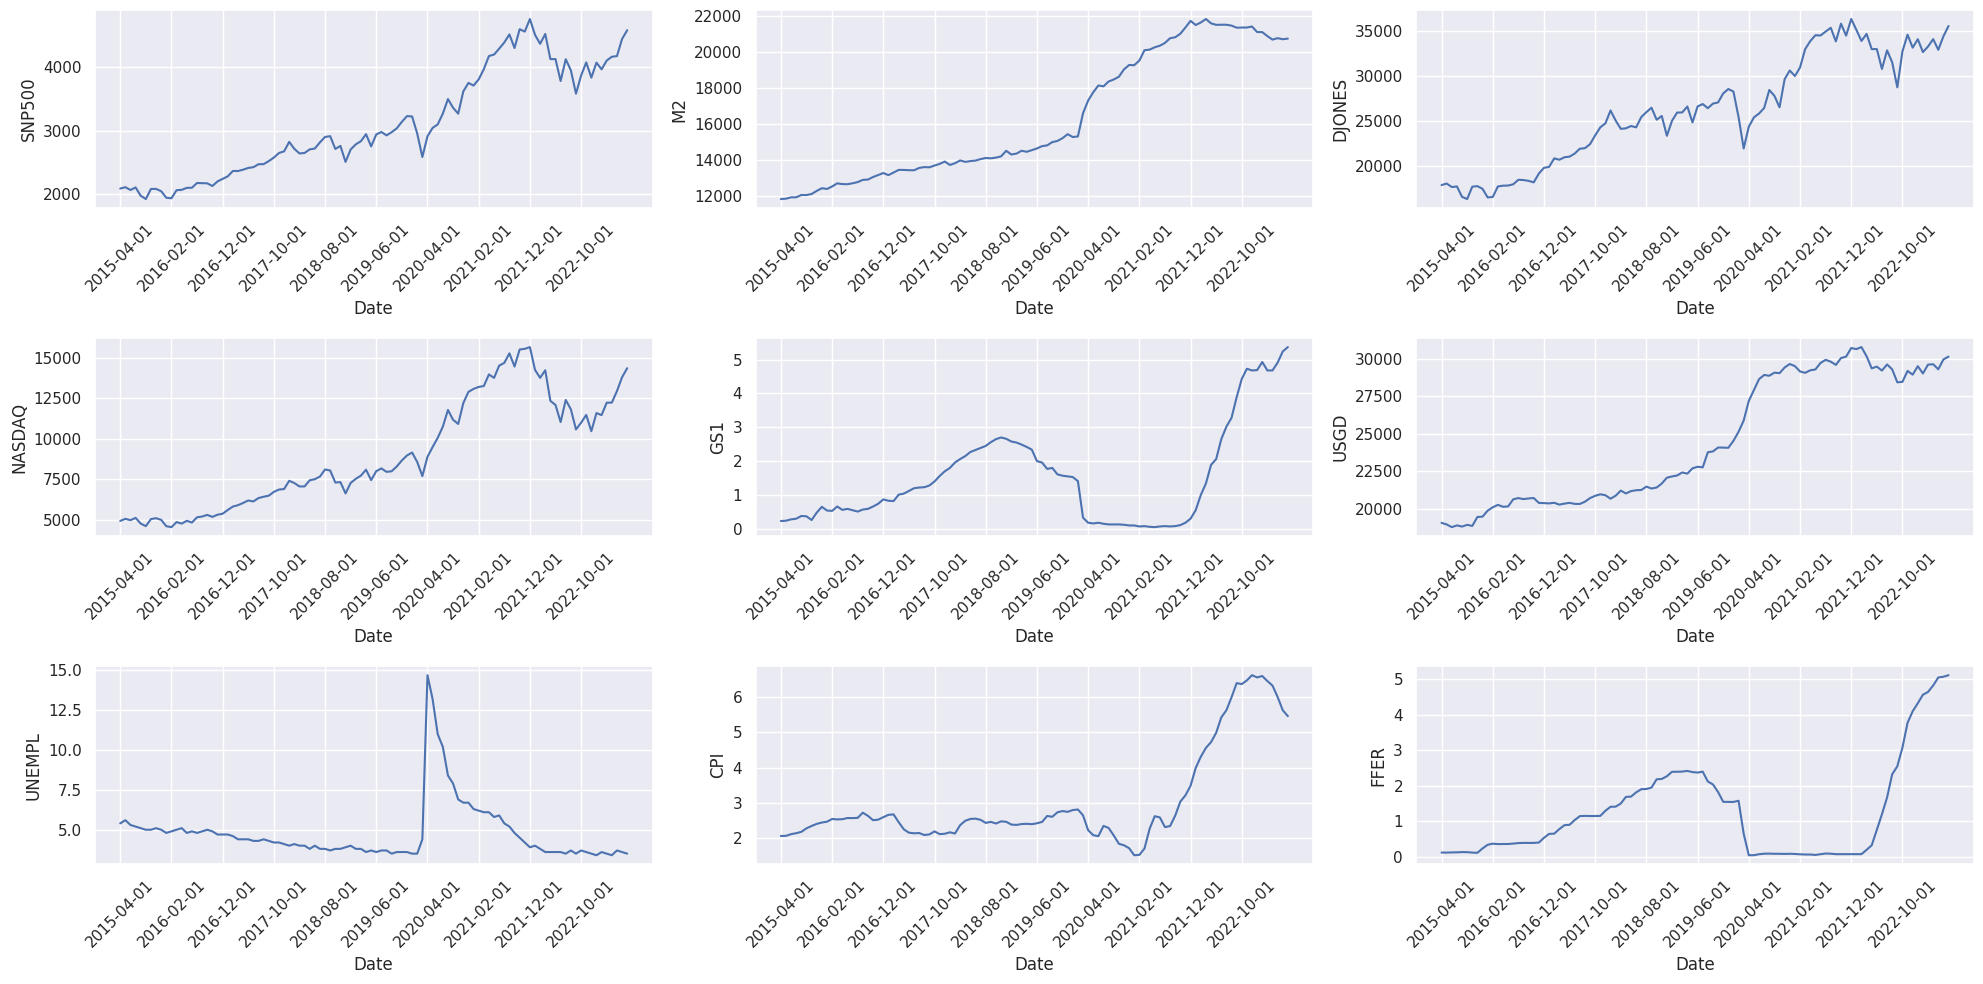

In [14]:
sns.set_context('notebook')
sns.set_theme(style="darkgrid")

fig, axes = plt.subplots(3, 3 , figsize=(20, 10))
clmns = ['SNP500' ,  'M2', 'DJONES', 'NASDAQ', 'GS1', 'USGD', 'UNEMPL', 'CPI', 'FFER']

for i, ax in enumerate(axes.flatten()):
    column = clmns[i]

    sns.lineplot(x= data.index, y= column, data=data, ax=ax)
    plt.sca(ax)  # Установите текущую ось для графика
    plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90], rotation=45)




plt.tight_layout()
plt.show()


## **Диаграммы рассеяния "Зависимая переменная - регрессор"**

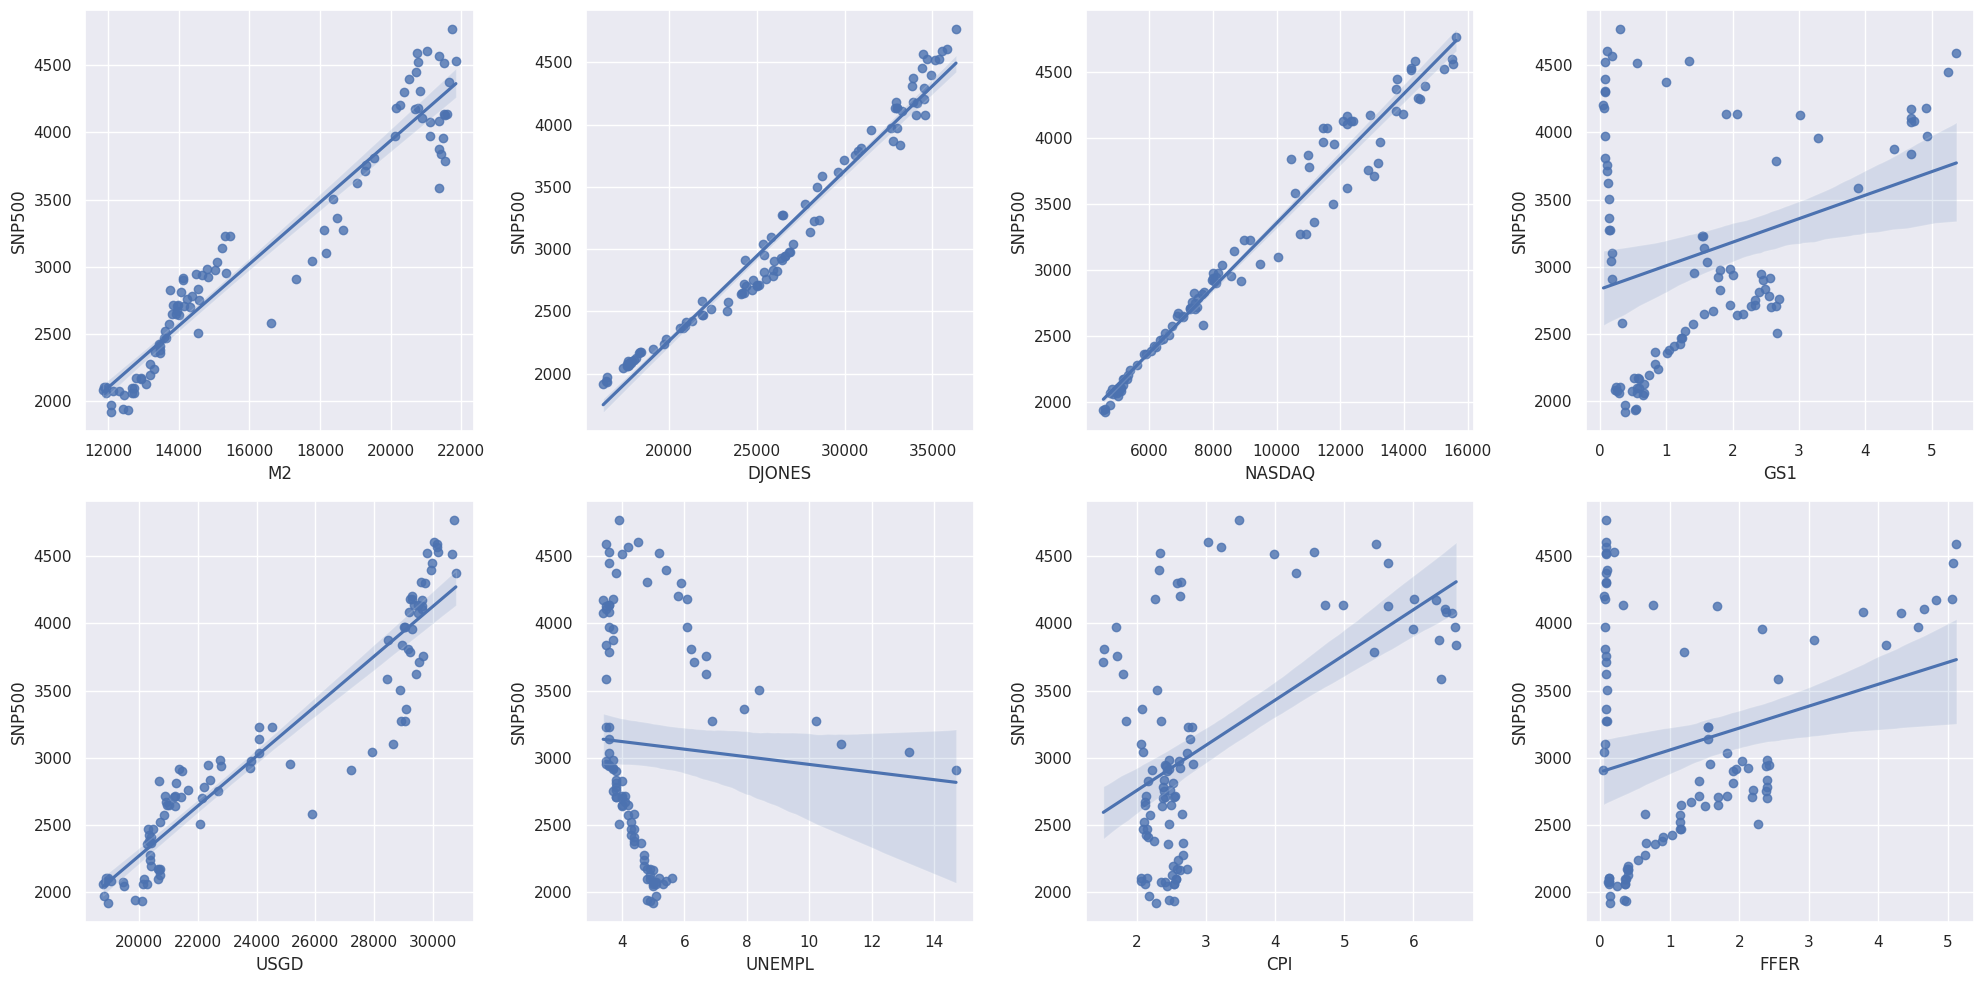

In [15]:


sns.set_context('notebook')
sns.set_theme(style="darkgrid")

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
clmns = [ 'M2', 'DJONES', 'NASDAQ', 'GS1', 'USGD', 'UNEMPL', 'CPI', 'FFER']

for i, ax in enumerate(axes.flatten()):
    column = clmns[i]

    sns.regplot(x=column, y="SNP500", data=data, ax=ax)


plt.tight_layout()
plt.show()



## **Построение множественной регрессии МНК**

In [16]:

linear_regression = smf.ols('SNP500 ~ M2+DJONES+NASDAQ+GS1+USGD+UNEMPL+CPI+FFER', data = data).fit()
print(linear_regression.summary())

                            OLS Regression Results                            
Dep. Variable:                 SNP500   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     7801.
Date:                Mon, 29 Jan 2024   Prob (F-statistic):          1.49e-125
Time:                        09:21:21   Log-Likelihood:                -488.11
No. Observations:                 100   AIC:                             994.2
Df Residuals:                      91   BIC:                             1018.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    544.3458     55.678      9.777      0.0

## **Тест** **Рамсея**

RESET тест Рамсея проверяет адеватность спецификации регрессоров и отвечает на вопрос, надо ли включать в модель степени независимых переменных. В рамках теста сравниваются две модели - исходная и новая с добавлением нелинейностей

Нулевая гипотеза теста (H0) - спецификация (набор регрессоров) адекватна.

Алтернативная гипотеза - спецификация не адекватна.

Тестовая статистика рассчитывается по формуле ниже и имеет распределение Фишера
со степенями свободы (m) и (n - (k+m) ) , где n - размер выборки , k - количество параметров исходной модели, m=1 - если при проведении теста добавляем в модель кубы ИЛИ квадраты регрессоров, m=2 - если всё вместе.

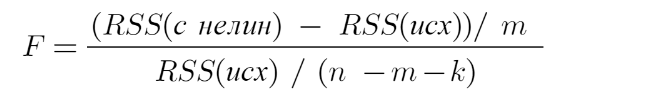

powers - варианты проведения теста Рамсея :    
[2] - к набору регрессоров будет добавляться набор их квадратов.</br>
[3] - набор кубов всех регрессоров.<br>
[2 , 3] - и квадратов, и кубов.

In [17]:

powers = [ [2] , [3] , [2,3] ]

p_dict = {'[2]' : 'Только квадраты' ,
          '[3]' : 'Только кубы' ,
           '[2, 3]' : 'Квадраты и кубы'}

dists = []

def RESET_ramsay_test(model , powers ):
  for power in powers :
    resettest = smd.linear_reset(res= model , power= power , use_f = True)
    dists.append( resettest.dist )
    print(p_dict[str(power)])
    print('Тестовая статистика' , resettest.distribution , resettest.fvalue)
    print(f'p-значение = P(F{int(resettest.df_num ), int( resettest.df_denom)} > {resettest.fvalue}) = {resettest.pvalue}')
    print()


RESET_ramsay_test( linear_regression , [ [2] , [3] , [2,3] ]  )
print(dists)

Только квадраты
Тестовая статистика F 31.63072175997472
p-значение = P(F(1, 90) > 31.63072175997472) = 2.0773136708671302e-07

Только кубы
Тестовая статистика F 35.9282891944595
p-значение = P(F(1, 90) > 35.9282891944595) = 4.170555693642525e-08

Квадраты и кубы
Тестовая статистика F 20.446677750175738
p-значение = P(F(2, 89) > 20.446677750175738) = 4.934426058494969e-08

[<scipy.stats._continuous_distns.f_gen object at 0x794462e3ea10>, <scipy.stats._continuous_distns.f_gen object at 0x794462e3ea10>, <scipy.stats._continuous_distns.f_gen object at 0x794462e3ea10>]


In [18]:
dists.clear()

Ни один из трех вериантов теста рамсея не подтвердил адекватность спецификации модели на любом из стандартных уровней значимости. Необходимо добавить нелинейности в модель. Добавим квадраты и кубы регрессоров

In [19]:
counter = 0

In [20]:
sq_l_data = deepcopy(data)

In [21]:
clmns = list(data.columns)
if counter == 0 :
  for column in clmns :
    if column != 'SNP500' :
      sq_l_data[f'sq_{column}'] = sq_l_data[column] ** 2
  for column in clmns :
    if column != 'SNP500' :
      sq_l_data[f'l_{column}'] = np.log(sq_l_data[column])

counter = 1 # При повторном случайном воспроизведении содержимого ячейки, в общую таблицу НЕ добавятся еще раз нелинейности, которые были учтены.
sq_l_data

,SNP500,M2,DJONES,NASDAQ,GS1,USGD,UNEMPL,CPI,FFER,sq_M2,...,sq_CPI,sq_FFER,l_M2,l_DJONES,l_NASDAQ,l_GS1,l_USGD,l_UNEMPL,l_CPI,l_FFER
Date,,,,,,,,,,,,,,,,,,,,,
2015-04-01,2085.51,11852.8,17840.52,4941.42,0.23,19064.8,5.4,2.063124,0.124667,1.404889e+08,...,4.256479,0.015542,9.380319,9.789228,8.505408,-1.469676,9.855599,1.686399,0.724221,-2.082112
2015-05-01,2107.39,11873.4,18010.68,5070.03,0.24,18957.8,5.6,2.066887,0.123226,1.409776e+08,...,4.272021,0.015185,9.382056,9.798720,8.531102,-1.427116,9.849971,1.722767,0.726044,-2.093737
2015-06-01,2063.11,11947.4,17619.51,4986.87,0.28,18779.0,5.3,2.114733,0.129000,1.427404e+08,...,4.472094,0.016641,9.388269,9.776762,8.514564,-1.272966,9.840495,1.667707,0.748928,-2.047943
2015-07-01,2103.84,11949.6,17689.86,5128.28,0.30,18895.3,5.2,2.141448,0.130323,1.427929e+08,...,4.585798,0.016984,9.388453,9.780747,8.542526,-1.203973,9.846668,1.648659,0.761482,-2.037743
2015-08-01,1972.18,12076.4,16528.03,4776.51,0.38,18816.9,5.1,2.180240,0.138065,1.458394e+08,...,4.753446,0.019062,9.399008,9.712813,8.471465,-0.967584,9.842511,1.629241,0.779435,-1.980034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-01,4109.31,20896.8,33274.15,12221.91,4.68,29613.8,3.5,6.451708,4.649032,4.366763e+08,...,41.624540,21.613501,9.947351,10.412536,9.410986,1.543298,10.295996,1.252763,1.864345,1.536659
2023-04-01,4169.48,20700.6,34098.16,12226.58,4.68,29639.7,3.4,6.322749,4.830000,4.285148e+08,...,39.977151,23.328900,9.937918,10.436999,9.411368,1.543298,10.296870,1.223775,1.844154,1.574846
2023-05-01,4179.83,20781.6,32908.27,12935.29,4.91,29302.2,3.7,6.000606,5.055806,4.318749e+08,...,36.007267,25.561179,9.941823,10.401479,9.467715,1.591274,10.285418,1.308333,1.791860,1.620537


<br></br>
<br></br>
Построим новую модель, учитывая нелинейности (новые регрессоры)

In [22]:
linear_regression_with_sq_l = smf.ols('SNP500 ~ M2+DJONES+NASDAQ+GS1+USGD+UNEMPL+CPI+FFER+sq_M2+sq_DJONES+sq_NASDAQ+sq_GS1+sq_USGD+sq_UNEMPL+sq_CPI+sq_FFER+l_M2+l_DJONES+l_NASDAQ+l_GS1+l_USGD+l_UNEMPL+l_CPI+l_FFER', data = sq_l_data).fit()
print(linear_regression_with_sq_l.summary())

                            OLS Regression Results                            
Dep. Variable:                 SNP500   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.250e+04
Date:                Mon, 29 Jan 2024   Prob (F-statistic):          2.15e-125
Time:                        09:21:21   Log-Likelihood:                -400.01
No. Observations:                 100   AIC:                             850.0
Df Residuals:                      75   BIC:                             915.2
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.4936   4.83e+04      0.000      1.0

Повторим тест Рамсея

In [23]:
RESET_ramsay_test(   linear_regression_with_sq_l , [ [2]] )

Только квадраты
Тестовая статистика F 0.07814463715563903
p-значение = P(F(1, 74) > 0.07814463715563903) = 0.7806075230820751



Тестовая статистика = 0.078 ; р-начение = 78,06 %. На всех стандартных уровнях значимости нулевая гипотеза не отвергается, спецификация модели адекватна. Функция плотности распределения вероятностей тестовой статистики в случае, когда верна нулевая гипотеза:

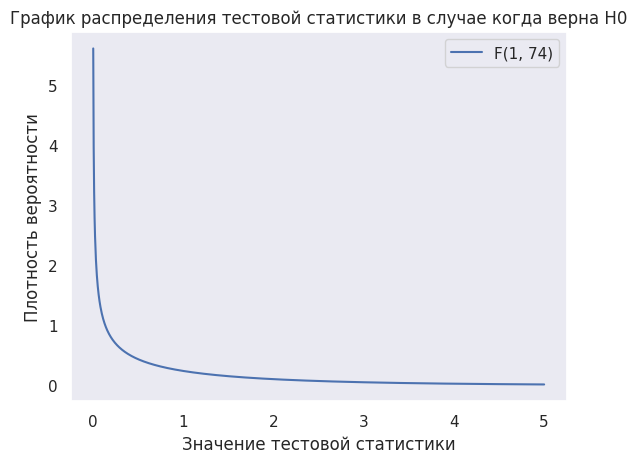

In [24]:
def Fisher_dist( dfn , dfd ) :


  x = np.linspace(0, 5, 1000)  # Например, от 0 до 5 с шагом 0.005
  pdf_values = SS.f.pdf(x, dfn, dfd)
  plt.plot(x, pdf_values, label=f'F({dfn}, {dfd})')
  plt.xlabel('Значение тестовой статистики')
  plt.ylabel('Плотность вероятности')
  plt.title('График распределения тестовой статистики в случае когда верна H0')
  plt.legend()
  plt.grid()
  plt.show()

Fisher_dist(1,74)

## **Тест фишера на значимость модели в целом**

Тест Фишера оценивает качество построенной модели В ЦЕЛОМ. Для этого построенная модель сравнивается с заведомо незначимой моделью. Незначимая модель имеет только 1 параметр - константу и не обладает нулевой объясняющей способностью. Константа представляет горизонтальную линию, на которой будут находиться все объясненные значения незначимой модели. Для незначимой модели RSS = TSS => ESS = 0

H0 теста Фишера  - построенная модель незначима

H1- построенная модель значима

Формула рассчёта тестовой статистики, где k - количество параметров исходной модели, n - количество наблюдений

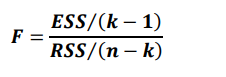

In [25]:
print(linear_regression_with_sq_l.summary())

                            OLS Regression Results                            
Dep. Variable:                 SNP500   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.250e+04
Date:                Mon, 29 Jan 2024   Prob (F-statistic):          2.15e-125
Time:                        09:21:21   Log-Likelihood:                -400.01
No. Observations:                 100   AIC:                             850.0
Df Residuals:                      75   BIC:                             915.2
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.4936   4.83e+04      0.000      1.0

Тестовая статистика 1.250e+04 ; р-значение =  2.15e-125< 1 %; на всех стандартных уровнях значимости нулевая гипотеза отвергается, модель − значима. Функция плотности распределения вероятностей тестовой статистики в случае, когда верна нулевая гипотеза:

Тестовая статистика будет иметь распределение Фишера со степенями свободы 24 и 75  - разность количества параметров нашей модели и незначимой (24) , m - разность количества наблюдений и количества параметров нашей модели linear_regression_with_sq_l (75).

<br></br>
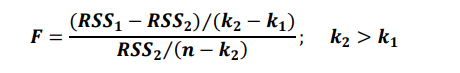

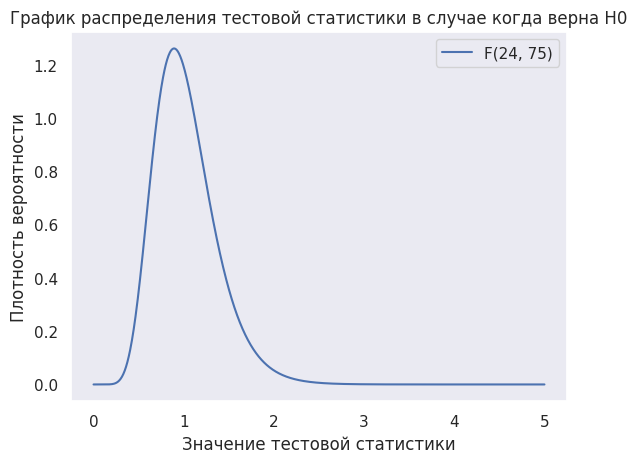

In [26]:
Fisher_dist(24,75)

## **Тест Стьюдента**

Тест Стьюдента проверяет значимость каждого отдельно взятого коэффициента регрессии.

H0 - коэффициент не значим
H1 - коэффициент значим

Формула тестовой статистики определяется как отношение значения коэффициента регрессии на его стандартное отклонение и имеет вид распределения Стьюдента


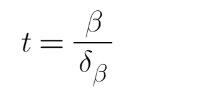



In [27]:
print(linear_regression_with_sq_l.summary())

                            OLS Regression Results                            
Dep. Variable:                 SNP500   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.250e+04
Date:                Mon, 29 Jan 2024   Prob (F-statistic):          2.15e-125
Time:                        09:21:22   Log-Likelihood:                -400.01
No. Observations:                 100   AIC:                             850.0
Df Residuals:                      75   BIC:                             915.2
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.4936   4.83e+04      0.000      1.0

Коэффициенты при регрессорах DJONES , NASDAQ , GS1 , sq_DJONES , sq_NASDAQ , sq_GS1 , l_DJONES , l_NASDAQ , l_GS1 , l_FFER значимы на всех стандартных уровнях значимости;

коэффициент при регрессоре sq_FFER значим на 10% уровне значимости;

коэффициенты при регрессорах M2 , USGD , UNEMPL , CPI , FFER , sq_M2 , sq_USGD , sq_UNEMPL , sq_CPI , l_M2 , l_USGD , l_UNEMPL , l_CPI и константа  не значимы.

Функция плотности распределения вероятностей тестовой статистики в случае, когда верна нулевая гипотеза:

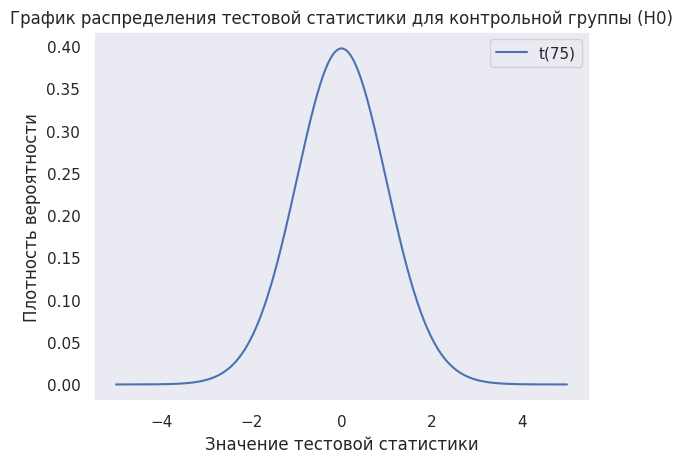

In [28]:
def Student_dist( s ) :


  x = np.linspace(-5, 5, 1000)  # Например, от 0 до 5 с шагом 0.005
  pdf_values = SS.t.pdf(x, s)
  plt.plot(x, pdf_values, label=f't({s})')
  plt.xlabel('Значение тестовой статистики')
  plt.ylabel('Плотность вероятности')
  plt.title('График распределения тестовой статистики для контрольной группы (H0)')
  plt.legend()
  plt.grid()
  plt.show()

Student_dist(75)

##**Анализ мультиколлинеарности**

Мультиколлинеарность в регрессионном анализе возникает, когда две или более переменных-регрессоров сильно коррелируют друг с другом, так что они не предоставляют уникальную или независимую информацию в регрессионной модели.

Способы определения мультиколлинеарности:

**1.Метод инфляционных факторов (VIF)**

Значение VIF начинается с 1 и не имеет верхнего предела. Общее эмпирическое правило для интерпретации VIF выглядит следующим образом:

Значение 1 указывает на отсутствие корреляции между данной переменной-регрессором и любыми другими переменными-регрессором в модели.

Значение от 1 до 10 указывает на умеренную корреляцию между данной переменной-регрессора и другими переменными-регрессорами в модели, но часто она недостаточно серьезная, чтобы требовать внимания.

Значение больше 10 указывает на потенциально сильную корреляцию между данной переменной-регрессором и другими переменными-регрессором в модели. В этом случае оценки коэффициентов и p-значения в выходных данных регрессии, вероятно, ненадежны.

In [29]:

y, X = dmatrices('SNP500 ~ M2+DJONES+NASDAQ+GS1+USGD+UNEMPL+CPI+FFER+sq_M2+sq_DJONES+sq_NASDAQ+sq_GS1+sq_USGD+sq_UNEMPL+sq_CPI+sq_FFER+l_M2+l_DJONES+l_NASDAQ+l_GS1+l_USGD+l_UNEMPL+l_CPI+l_FFER', sq_l_data, return_type='dataframe')
clmns = list(sq_l_data.columns)
VIFs = []
for column in sq_l_data :

  c = clmns.index(column)
  vif = variance_inflation_factor(X.values, c)
  VIFs.append(vif)


VIF_matrix = pd.DataFrame( { 'VIF' : VIFs , 'Columns' : list(sq_l_data.columns)})
VIF_matrix = VIF_matrix.drop(0)
VIF_matrix[[ 'Columns' , 'VIF']]


,Columns,VIF
1,M2,4.984541e+06
2,DJONES,2.156382e+05
3,NASDAQ,8.994811e+04
4,GS1,6.487393e+02
5,USGD,3.002700e+06
6,UNEMPL,6.633517e+03
7,CPI,1.937826e+04
8,FFER,4.351300e+02
9,sq_M2,1.326762e+06
10,sq_DJONES,5.484486e+04


Между регрессорами M2, DJONES , NASDAQ , GS1 , USGD , UNEMPL , CPI , FFER ,  sq_M2, sq_DJONES , sq_NASDAQ , sq_GS1 , sq_USGD , sq_UNEMPL , sq_CPI , sq_FFER ,  l_M2, l_DJONES , l_NASDAQ , l_GS1 , l_USGD , l_UNEMPL , l_CPI , l_FFER имеется тесная линейная связь, присутствует мультиколлинеарность.

**2.Матрица корреляций**

Одним из способов количественной оценки мультиколлинеарности является использование коэффициента корреляции Пирсона , который является мерой линейной связи между двумя переменными . Он имеет значение от -1 до 1, где:

-1 указывает на совершенно отрицательную линейную корреляцию между двумя переменными

0 указывает на отсутствие линейной корреляции между двумя переменными

1 указывает на совершенно положительную линейную корреляцию между двумя переменными.

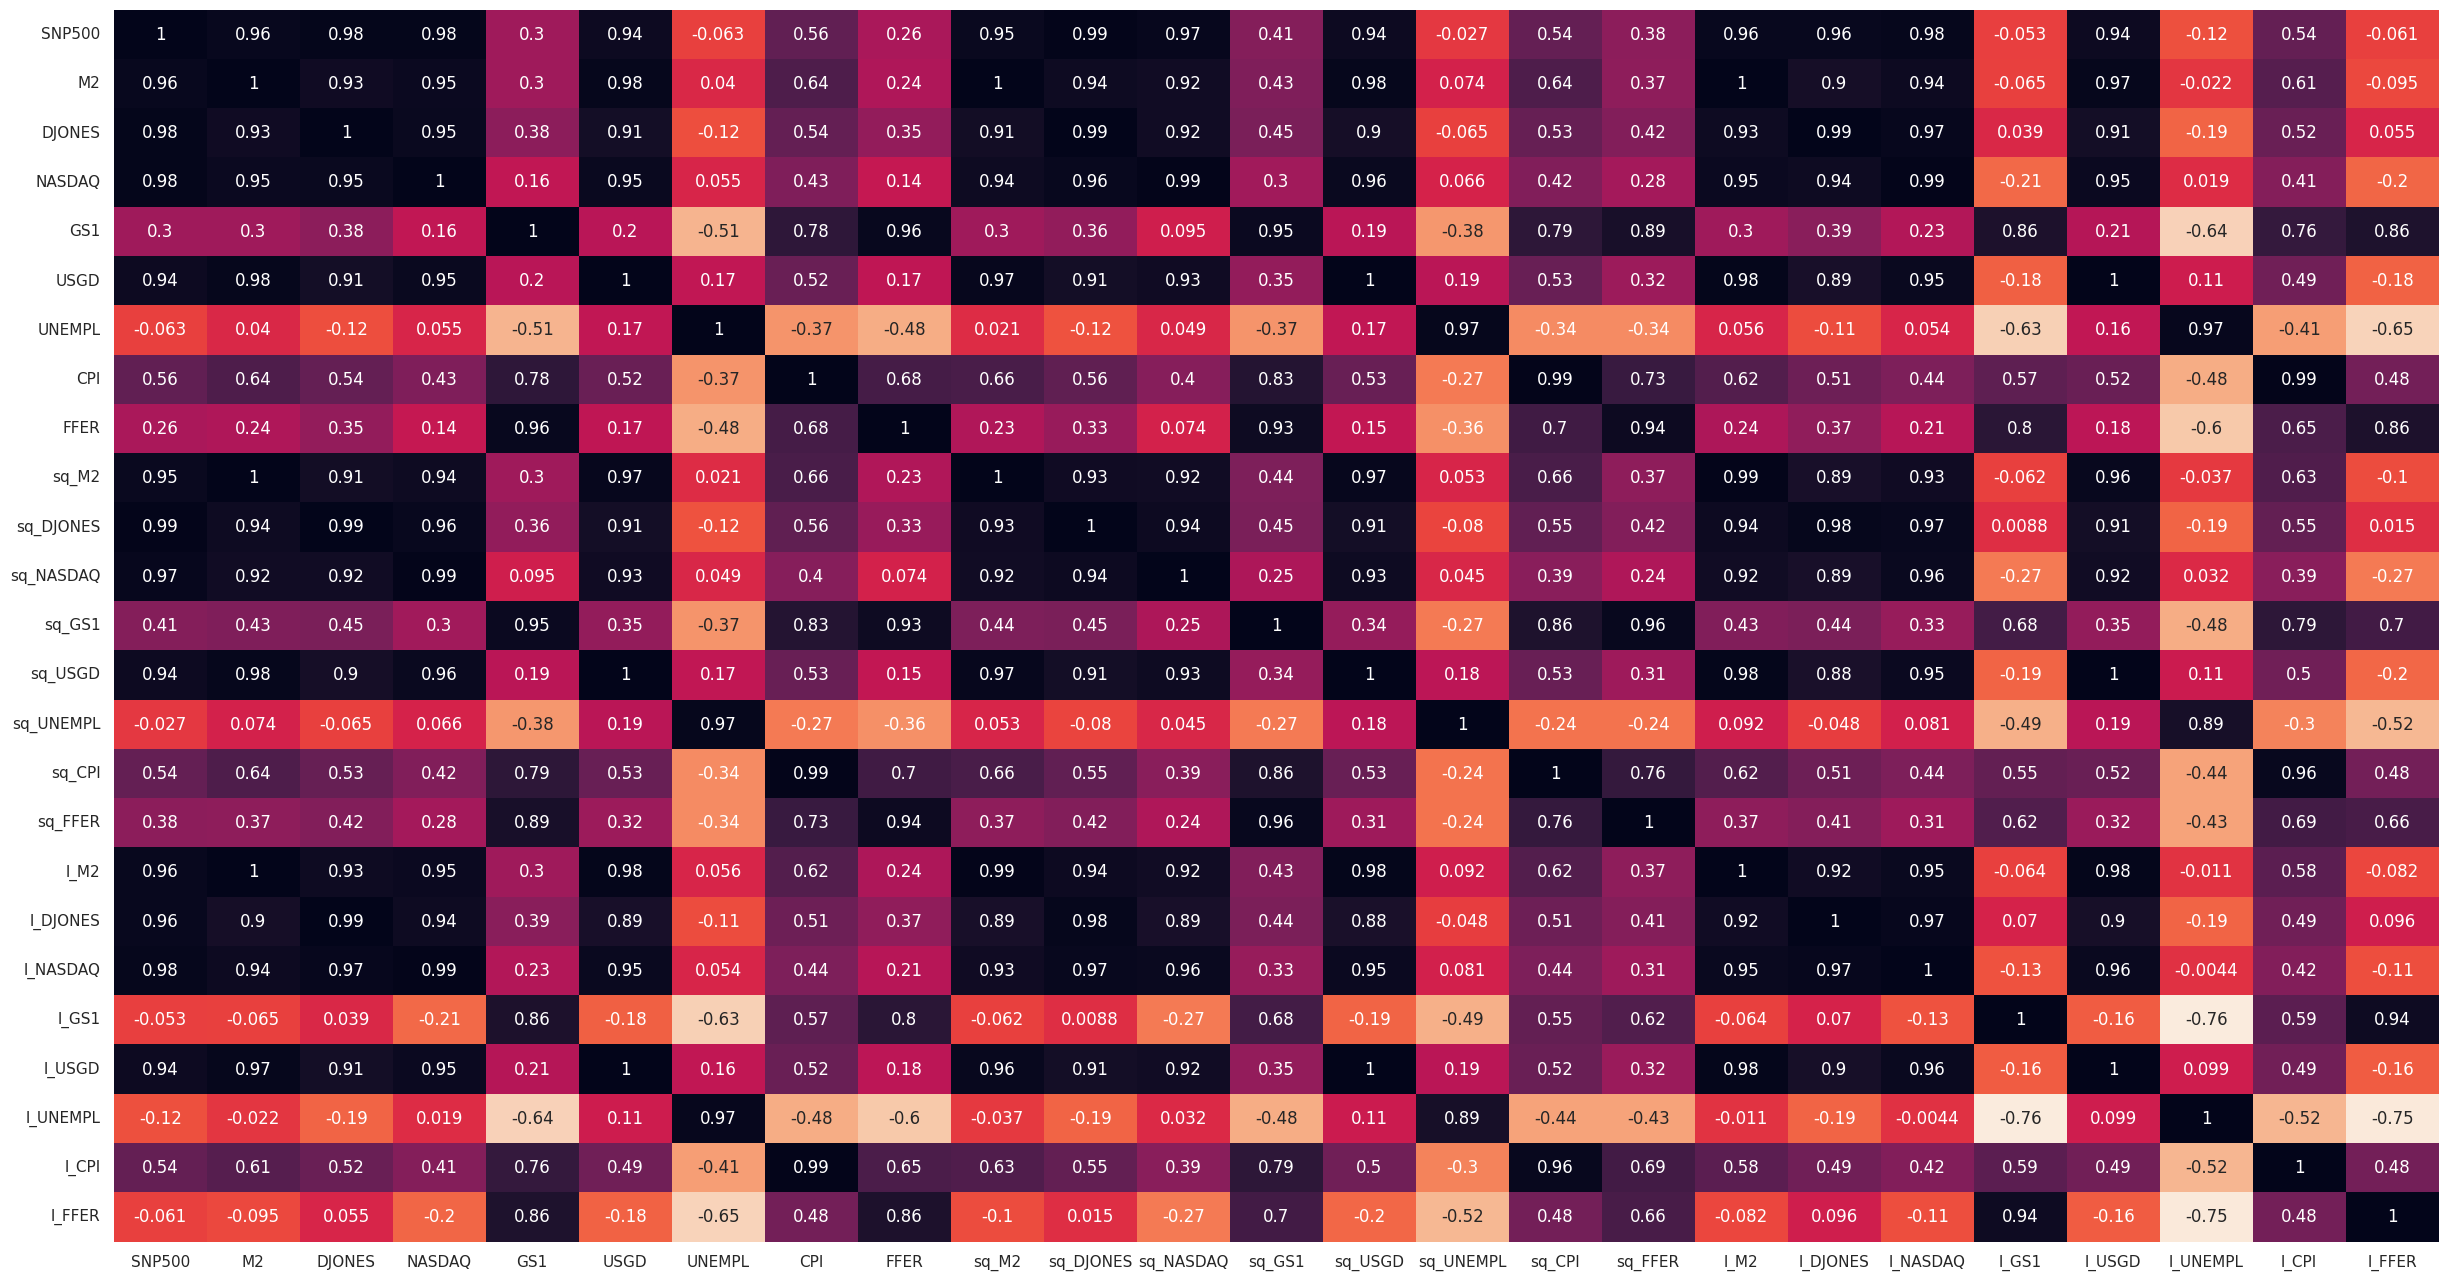

In [30]:
cols = list(sq_l_data.columns)
plt.figure(figsize=(30, 16))
hm = sns.heatmap(sq_l_data[cols].corr(), cbar = False, annot = True , cmap ='rocket_r')

plt.show()

**Избавление от мультиколлинеарности. Создание индекса и метод главных компонент**

Анализ основных компонентов, часто сокращенно PCA, представляет собой метод машинного обучения без учителя , который направлен на поиск основных компонентов — линейных комбинаций исходных регрессоров — которые объясняют большую часть вариаций в наборе данных.

Цель PCA состоит в том, чтобы объяснить большую часть изменчивости в наборе данных с меньшим количеством переменных, чем в исходном наборе данных.

Индекс - новый регрессор который представляет собой переменную, описывающую как можно большую дисперсию регрессоров исходной модели, входящих в него.

**Объединим сильно коррелирующие с друг другом регрессоры в общую переменную(индекс)**

**Строим Индекс характеризующий состояние фондового рынка США из следующих показателей:**
 1. DJONES - Промышленный индекс Доу-Джонса

2. NASDAQ - Фондовый индекс NASDAQ

Регрессоры которые мы будем объединять в индекс.

In [31]:
FondMarketIndex = deepcopy(sq_l_data[['DJONES' , 'NASDAQ' , 'sq_DJONES' , 'sq_NASDAQ' , 'l_DJONES' , 'l_NASDAQ']])
FondMarketIndex

,DJONES,NASDAQ,sq_DJONES,sq_NASDAQ,l_DJONES,l_NASDAQ
Date,,,,,,
2015-04-01,17840.52,4941.42,3.182842e+08,2.441763e+07,9.789228,8.505408
2015-05-01,18010.68,5070.03,3.243846e+08,2.570520e+07,9.798720,8.531102
2015-06-01,17619.51,4986.87,3.104471e+08,2.486887e+07,9.776762,8.514564
2015-07-01,17689.86,5128.28,3.129311e+08,2.629926e+07,9.780747,8.542526
2015-08-01,16528.03,4776.51,2.731758e+08,2.281505e+07,9.712813,8.471465
...,...,...,...,...,...,...
2023-03-01,33274.15,12221.91,1.107169e+09,1.493751e+08,10.412536,9.410986
2023-04-01,34098.16,12226.58,1.162685e+09,1.494893e+08,10.436999,9.411368
2023-05-01,32908.27,12935.29,1.082954e+09,1.673217e+08,10.401479,9.467715


In [32]:
def pca_test( index_name ) :
    n_components = len( index_name.columns )

    pca_test = PCA(n_components= n_components)
    pca_test.fit( index_name )
    sns.set(style='whitegrid')
    plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
    plt.xlabel('Число компонент')
    plt.ylabel('Процент объясненной дисперсии')
    plt.axvline(linewidth=4, color='r', linestyle = '--', x=1, ymin=0, ymax=1)
    display(plt.show())
    evr = pca_test.explained_variance_ratio_
    cvr = np.cumsum(pca_test.explained_variance_ratio_)
    pca_df = pd.DataFrame()
    pca_df['Интегральная'] = cvr
    pca_df['Доля'] = evr
    pca_df.index = [ 1, 2, 3 ,4 ,5 ,6]
    #pca_df['Собственные значения'] = pca_test.singular_values_
    display(pca_df.head(10))

    pca_dims = []
    lst = [ 1 , 2 ,3 ,4 ,5 ,6 ]
    for x in lst :
        pca_dims.append(x)

    pca_test_df = pd.DataFrame( pca_test.components_, columns= list(index_name.columns) , index=pca_dims)
    print('Посчитаем собственные векторы (нагрузку на компоненты)')
    display(pca_test_df.head(6).T)

График показывает что построенный индекс будет объяснять почти 100% дисперсии входящих в него переменных.

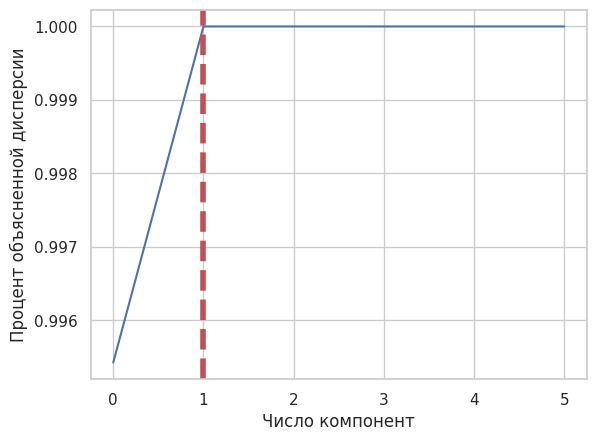

None

,Интегральная,Доля
1,0.995427,9.954272e-01
2,1.000000,4.572751e-03
3,1.000000,3.884751e-12
4,1.000000,2.479536e-13
5,1.000000,4.341429e-22
6,1.000000,2.705010e-23


Посчитаем собственные векторы (нагрузку на компоненты)


,1,2,3,4,5,6
DJONES,1.852754e-05,-1.592012e-05,0.854832,0.518904,-5.695447e-05,7.259478e-05
NASDAQ,1.003058e-05,3.626667e-05,0.518904,-0.854832,-1.712227e-04,-5.426170e-05
sq_DJONES,9.814053e-01,-1.919470e-01,-0.000020,-0.000009,8.063399e-10,-6.684975e-10
sq_NASDAQ,1.919470e-01,9.814053e-01,-0.000009,0.000038,3.643312e-09,1.340170e-09
l_DJONES,7.228140e-10,-1.130094e-09,0.000069,0.000051,2.612013e-01,-9.652843e-01
l_NASDAQ,1.132537e-09,2.255655e-09,0.000124,-0.000135,9.652843e-01,2.612013e-01


In [33]:
pca_test(FondMarketIndex)

Добавляем Главные компоненты с собственным значением больше среднего, в нашем случае - это только первая Главная компонента, она берет на себя 99,5
% дисперсии.

In [34]:
pca = PCA(n_components=1)
sc = StandardScaler()
FondMarketIndex = sc.fit_transform(FondMarketIndex)
FondMarketIndex_с = pca.fit_transform(FondMarketIndex)



In [35]:

sq_l_data['FondMarketIndex'] = FondMarketIndex_с

График временного ряда индекса и входящих в него элементов

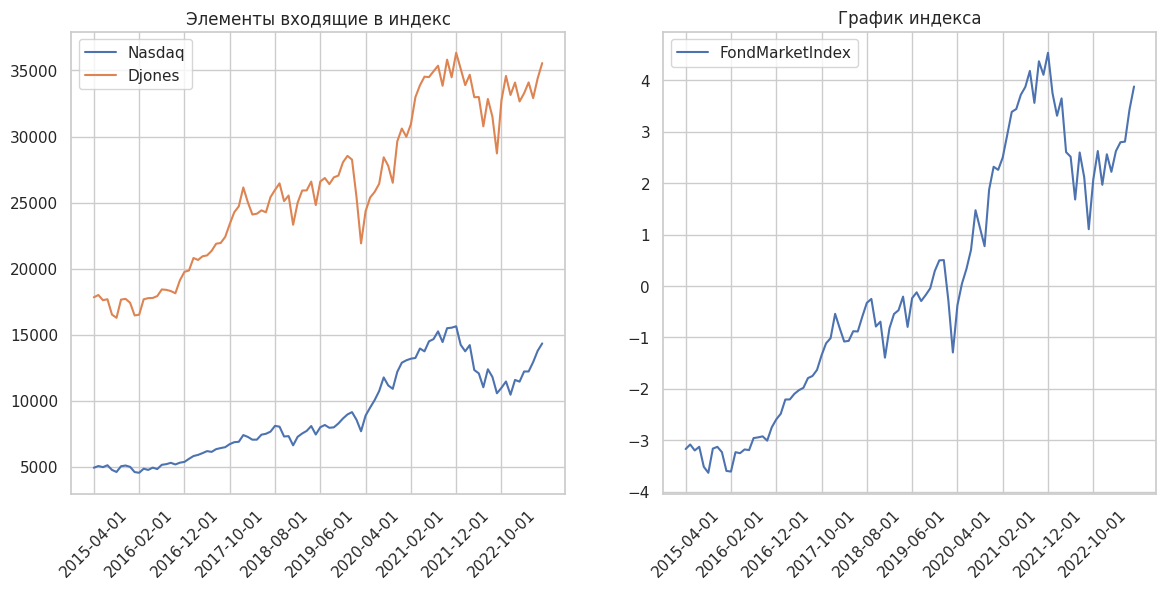

In [36]:

x = sq_l_data.index


# Создание объекта сетки
grid = GridSpec(1, 2)
plt.figure(figsize=(14, 6))
# Создание подграфиков
plt.subplot(grid[0, 0])

plt.plot(x, sq_l_data['NASDAQ'] , label = 'Nasdaq')
plt.plot(x, sq_l_data['DJONES'] , label = 'Djones')
plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90], rotation=45)
plt.title('Элементы входящие в индекс')
plt.legend()

plt.subplot(grid[0, 1])

plt.plot(x, sq_l_data['FondMarketIndex'] , label = 'FondMarketIndex')
plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90], rotation=45)
plt.title('График индекса')

plt.legend()
# Отображение графиков
plt.show()

In [37]:
sq_l_data.drop(columns = ['DJONES' , 'NASDAQ' , 'sq_DJONES' , 'sq_NASDAQ' , 'l_DJONES' , 'l_NASDAQ'] , inplace = True)

**Индекс2**

Строим Индекс характеризующий фискально-монетарную политику США из следующих показателей:
 1.  M2 - Денежный агрегат M2 США

2.  USGD - Рыночная стоимость гос.долга США

In [38]:
MonetaryFiscalIndex = deepcopy(sq_l_data[['M2' , 'USGD' , 'sq_M2' , 'sq_USGD' , 'l_M2' , 'l_USGD']])
MonetaryFiscalIndex

,M2,USGD,sq_M2,sq_USGD,l_M2,l_USGD
Date,,,,,,
2015-04-01,11852.8,19064.8,1.404889e+08,3.634666e+08,9.380319,9.855599
2015-05-01,11873.4,18957.8,1.409776e+08,3.593982e+08,9.382056,9.849971
2015-06-01,11947.4,18779.0,1.427404e+08,3.526508e+08,9.388269,9.840495
2015-07-01,11949.6,18895.3,1.427929e+08,3.570324e+08,9.388453,9.846668
2015-08-01,12076.4,18816.9,1.458394e+08,3.540757e+08,9.399008,9.842511
...,...,...,...,...,...,...
2023-03-01,20896.8,29613.8,4.366763e+08,8.769772e+08,9.947351,10.295996
2023-04-01,20700.6,29639.7,4.285148e+08,8.785118e+08,9.937918,10.296870
2023-05-01,20781.6,29302.2,4.318749e+08,8.586189e+08,9.941823,10.285418


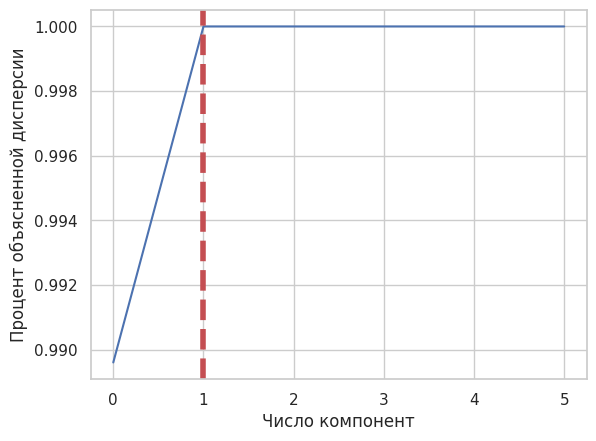

None

,Интегральная,Доля
1,0.9896,9.896003e-01
2,1.0000,1.039969e-02
3,1.0000,8.426551e-13
4,1.0000,6.277600e-14
5,1.0000,2.302477e-23
6,1.0000,1.529386e-24


Посчитаем собственные векторы (нагрузку на компоненты)


,1,2,3,4,5,6
M2,1.430970e-05,-2.004447e-05,-0.648189,-0.761480,-1.064080e-04,-6.598697e-05
USGD,1.750613e-05,1.191987e-05,-0.761480,0.648189,-4.776308e-05,6.716429e-05
sq_M2,4.851149e-01,-8.744504e-01,0.000014,0.000020,1.603997e-09,9.723035e-10
sq_USGD,8.744504e-01,4.851149e-01,0.000018,-0.000012,5.406232e-10,-6.548171e-10
l_M2,8.607666e-10,-8.730942e-10,-0.000084,-0.000093,8.407327e-01,5.414504e-01
l_USGD,7.097015e-10,5.740630e-10,-0.000064,0.000052,5.414504e-01,-8.407327e-01


In [39]:
pca_test(MonetaryFiscalIndex)

Добавляем главные компоненты с собственным значением больше среднего, в нашем случае - это только первая главная компонента, она берет на себя 98,96 % дисперсии.

In [40]:
pca = PCA(n_components=1)
MonetaryFiscalIndex = sc.fit_transform(MonetaryFiscalIndex)
MonetaryFiscalIndex_с = pca.fit_transform(MonetaryFiscalIndex)


In [41]:
pd.DataFrame(MonetaryFiscalIndex_с).head(5)

,0
0,-3.143798
1,-3.167804
2,-3.193672
3,-3.158615
4,-3.135893


In [42]:

sq_l_data['MonetaryFiscalIndex'] = MonetaryFiscalIndex_с

Графики построенного индекса и составляющих его переменных:

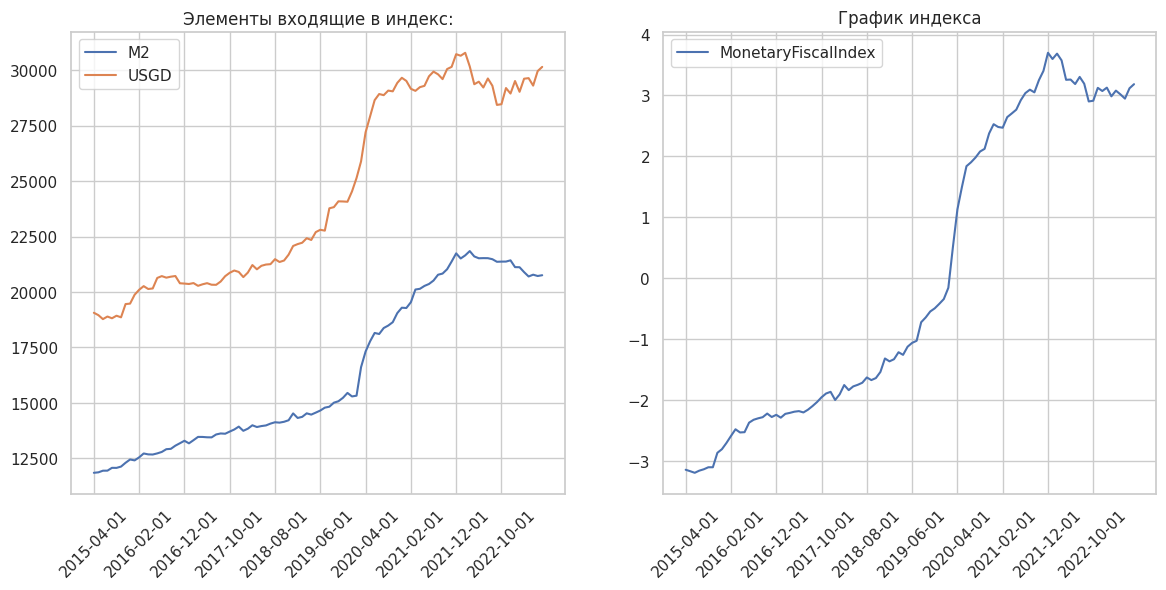

In [43]:
x = sq_l_data.index


# Создание объекта сетки
grid = GridSpec(1, 2)
plt.figure(figsize=(14, 6))
# Создание подграфиков
plt.subplot(grid[0, 0])

plt.plot(x, sq_l_data['M2'] , label = 'M2')
plt.plot(x, sq_l_data['USGD'] , label = 'USGD')
plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90], rotation=45)
plt.title('Элементы входящие в индекс:')
plt.legend()

plt.subplot(grid[0, 1])

plt.plot(x, sq_l_data['MonetaryFiscalIndex'] , label = 'MonetaryFiscalIndex')
plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90], rotation=45)
plt.title('График индекса')

plt.legend()
# Отображение графиков
plt.show()

In [44]:
sq_l_data.drop(columns = ['M2' , 'USGD' , 'sq_M2' , 'sq_USGD' , 'l_M2' , 'l_USGD'] , inplace = True)

После преобразования регрессоров в индексы проведем тест Рамсея еще раз, чтобы проверить адекватность спецификации модели.

In [45]:
linear_regression = smf.ols('SNP500 ~ GS1+UNEMPL+CPI+FFER+sq_CPI+sq_FFER+sq_GS1+sq_UNEMPL+l_GS1+l_UNEMPL+l_CPI+l_FFER+FondMarketIndex+MonetaryFiscalIndex', data = sq_l_data).fit()
RESET_ramsay_test(   linear_regression, [ [2]] )

Только квадраты
Тестовая статистика F 38.97062404337495
p-значение = P(F(1, 84) > 38.97062404337495) = 1.681989797963634e-08



Значение тестовой статистики - 38.97 . P-значение - 1.68e-08. На 1% уровне значимости нулевая гипотеза отвергается. Добавим в спецификацию квадрат индекса фондового рынка и проведем тест Рамсея снова.

In [46]:
sq_l_data['sq_FondMarketIndex'] = sq_l_data['FondMarketIndex'] ** 2
sq_l_data.head(5)

,SNP500,GS1,UNEMPL,CPI,FFER,sq_GS1,sq_UNEMPL,sq_CPI,sq_FFER,l_GS1,l_UNEMPL,l_CPI,l_FFER,FondMarketIndex,MonetaryFiscalIndex,sq_FondMarketIndex
Date,,,,,,,,,,,,,,,,
2015-04-01,2085.51,0.23,5.4,2.063124,0.124667,0.0529,29.16,4.256479,0.015542,-1.469676,1.686399,0.724221,-2.082112,-3.167935,-3.143798,10.035812
2015-05-01,2107.39,0.24,5.6,2.066887,0.123226,0.0576,31.36,4.272021,0.015185,-1.427116,1.722767,0.726044,-2.093737,-3.080492,-3.167804,9.489433
2015-06-01,2063.11,0.28,5.3,2.114733,0.129000,0.0784,28.09,4.472094,0.016641,-1.272966,1.667707,0.748928,-2.047943,-3.196138,-3.193672,10.215299
2015-07-01,2103.84,0.30,5.2,2.141448,0.130323,0.0900,27.04,4.585798,0.016984,-1.203973,1.648659,0.761482,-2.037743,-3.124684,-3.158615,9.763653
2015-08-01,1972.18,0.38,5.1,2.180240,0.138065,0.1444,26.01,4.753446,0.019062,-0.967584,1.629241,0.779435,-1.980034,-3.513582,-3.135893,12.345256


In [47]:
linear_regression = smf.ols('SNP500 ~ GS1+UNEMPL+CPI+FFER+sq_CPI+sq_FFER+sq_GS1+sq_UNEMPL+l_GS1+l_UNEMPL+l_CPI+l_FFER+FondMarketIndex+MonetaryFiscalIndex+sq_FondMarketIndex', data = sq_l_data).fit()
RESET_ramsay_test(   linear_regression, [ [2]] )

Только квадраты
Тестовая статистика F 1.4008666473694826
p-значение = P(F(1, 83) > 1.4008666473694826) = 0.23995732505712175



Значение тестовой статистики - 1.4 . P-значение - 0.23. На всех уровнях значимости нулевая гипотеза не отвергается. Спецификация модели адекватна.

После преобразований регрессоров в индексы получаем следующую спецификацию:

In [48]:
pd.options.display.float_format = '{:20,.5f}'.format

In [49]:
sq_l_data

,SNP500,GS1,UNEMPL,CPI,FFER,sq_GS1,sq_UNEMPL,sq_CPI,sq_FFER,l_GS1,l_UNEMPL,l_CPI,l_FFER,FondMarketIndex,MonetaryFiscalIndex,sq_FondMarketIndex
Date,,,,,,,,,,,,,,,,
2015-04-01,"2,085.51000",0.23000,5.40000,2.06312,0.12467,0.05290,29.16000,4.25648,0.01554,-1.46968,1.68640,0.72422,-2.08211,-3.16793,-3.14380,10.03581
2015-05-01,"2,107.39000",0.24000,5.60000,2.06689,0.12323,0.05760,31.36000,4.27202,0.01518,-1.42712,1.72277,0.72604,-2.09374,-3.08049,-3.16780,9.48943
2015-06-01,"2,063.11000",0.28000,5.30000,2.11473,0.12900,0.07840,28.09000,4.47209,0.01664,-1.27297,1.66771,0.74893,-2.04794,-3.19614,-3.19367,10.21530
2015-07-01,"2,103.84000",0.30000,5.20000,2.14145,0.13032,0.09000,27.04000,4.58580,0.01698,-1.20397,1.64866,0.76148,-2.03774,-3.12468,-3.15862,9.76365
2015-08-01,"1,972.18000",0.38000,5.10000,2.18024,0.13806,0.14440,26.01000,4.75345,0.01906,-0.96758,1.62924,0.77943,-1.98003,-3.51358,-3.13589,12.34526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-01,"4,109.31000",4.68000,3.50000,6.45171,4.64903,21.90240,12.25000,41.62454,21.61350,1.54330,1.25276,1.86434,1.53666,2.62176,3.07979,6.87362
2023-04-01,"4,169.48000",4.68000,3.40000,6.32275,4.83000,21.90240,11.56000,39.97715,23.32890,1.54330,1.22378,1.84415,1.57485,2.79366,3.01813,7.80454
2023-05-01,"4,179.83000",4.91000,3.70000,6.00061,5.05581,24.10810,13.69000,36.00727,25.56118,1.59127,1.30833,1.79186,1.62054,2.80575,2.94866,7.87222


In [50]:
linear_regression = smf.ols('SNP500 ~ GS1+UNEMPL+CPI+FFER+sq_GS1+sq_UNEMPL+sq_CPI+sq_FFER+l_GS1+l_UNEMPL+l_CPI+l_FFER+FondMarketIndex+MonetaryFiscalIndex+sq_FondMarketIndex', data = sq_l_data).fit()
print(linear_regression.summary())

                            OLS Regression Results                            
Dep. Variable:                 SNP500   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.231e+04
Date:                Mon, 29 Jan 2024   Prob (F-statistic):          1.41e-133
Time:                        09:21:27   Log-Likelihood:                -429.94
No. Observations:                 100   AIC:                             891.9
Df Residuals:                      84   BIC:                             933.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            2691.2844    

Константа и коэффициенты при регрессорах GS1 , CPI , sq_CPI , l_CPI , FondMarketIndex , MonetaryFiscalIndex , sq_FondMarketIndex значимы на всех стандартных уровнях значимости.

Коэффициенты при регрессорах UNEMPL  , FFER , sq_GS1 , sq_UNEMPL , l_UNEMPL, l_FFER не значимы.

На 10% уровне значимости значимы коэффициенты при регрессорах sq_FFER , l_GS1.

##**Тест на избыточные переменные**

В тесте на избыточные переменные проверяется, можно ли убрать выбранный регрессор из модели. Для принятия решения сравниваются 2 модели МНК : с выбранный регрессором и без него, остальные регрессоры идентичны.

H0 - переменная избыточная
H1 - переменная не избыточная

Формула рассчёта тестовой статистики:

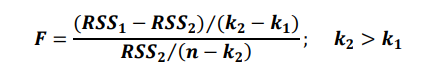

где RSS1 и k1 - параметры модели после удаления переменной(ых),
а RSS2 и k2 - параметры исходной модели.


In [51]:
list(sq_l_data.columns)

['SNP500',
 'GS1',
 'UNEMPL',
 'CPI',
 'FFER',
 'sq_GS1',
 'sq_UNEMPL',
 'sq_CPI',
 'sq_FFER',
 'l_GS1',
 'l_UNEMPL',
 'l_CPI',
 'l_FFER',
 'FondMarketIndex',
 'MonetaryFiscalIndex',
 'sq_FondMarketIndex']

Проверяем на избыточность незначимые регрессоры sq_GS1 и sq_UNEMPL. Для этого сравним 2 модели МНК : исходную: со всеми регрессорами и новую : без регрессоров sq_GS1 и sq_UNEMPL.

Исходная модель

In [52]:
linear_regression = smf.ols('SNP500 ~ GS1+UNEMPL+CPI+FFER+sq_GS1+sq_UNEMPL+sq_CPI+sq_FFER+l_GS1+l_UNEMPL+l_CPI+l_FFER+FondMarketIndex+MonetaryFiscalIndex+sq_FondMarketIndex', data = sq_l_data).fit()
print(linear_regression.summary())

                            OLS Regression Results                            
Dep. Variable:                 SNP500   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.231e+04
Date:                Mon, 29 Jan 2024   Prob (F-statistic):          1.41e-133
Time:                        09:21:28   Log-Likelihood:                -429.94
No. Observations:                 100   AIC:                             891.9
Df Residuals:                      84   BIC:                             933.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            2691.2844    

Квадраты остатков исходной модели

In [53]:
residuals1 = (sq_l_data['SNP500'] - linear_regression.fittedvalues ) ** 2
residuals1

Date
2015-04-01              649.27994
2015-05-01              390.58342
2015-06-01               35.15500
2015-07-01              572.11016
2015-08-01               28.16006
                     ...         
2023-03-01               60.41155
2023-04-01              598.42787
2023-05-01              154.43469
2023-06-01            1,283.37544
2023-07-01               34.24027
Length: 100, dtype: float64

Модель без регрессоров sq_GS1 и sq_UNEMPL

In [54]:
linear_regression_delete_variables = smf.ols('SNP500 ~ GS1+UNEMPL+CPI+FFER+sq_CPI+sq_FFER+l_GS1+l_UNEMPL+l_CPI+l_FFER+FondMarketIndex+MonetaryFiscalIndex+sq_FondMarketIndex', data = sq_l_data).fit()
print(linear_regression_delete_variables.summary())

                            OLS Regression Results                            
Dep. Variable:                 SNP500   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.412e+04
Date:                Mon, 29 Jan 2024   Prob (F-statistic):          3.33e-137
Time:                        09:21:28   Log-Likelihood:                -431.38
No. Observations:                 100   AIC:                             890.8
Df Residuals:                      86   BIC:                             927.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            2540.2938    

Квадраты остатков новой модели.

In [55]:
residuals2 = (sq_l_data['SNP500'] - linear_regression_delete_variables.fittedvalues ) ** 2
residuals2

Date
2015-04-01              773.79591
2015-05-01              474.19050
2015-06-01               62.97482
2015-07-01              662.46024
2015-08-01               49.37874
                     ...         
2023-03-01              149.57079
2023-04-01              808.41408
2023-05-01              428.53970
2023-06-01            1,493.14705
2023-07-01              216.21686
Length: 100, dtype: float64

Суммы квадратов остатков обеих моделей МНК.(1 - исходная, 2 - новая)

In [56]:
res_sum_lr = sum(residuals1)
res_sum_lr

31763.469188231196

In [57]:
res_sum_del = sum(residuals2)
res_sum_del

32689.52290072747

Рассчёт тестовой статистики

In [58]:
F_stat = (  (res_sum_del - res_sum_lr ) / 2 ) / ( res_sum_lr / (100 - 16))

In [59]:
F_stat

1.2244964709098678

P-value

In [60]:
dfn = 2
dfd = 84
value = 1.2244964709098678

p_val = 1 - SS.f.cdf(value, dfn, dfd)
print("p value:", p_val)

p value: 0.299097373081886


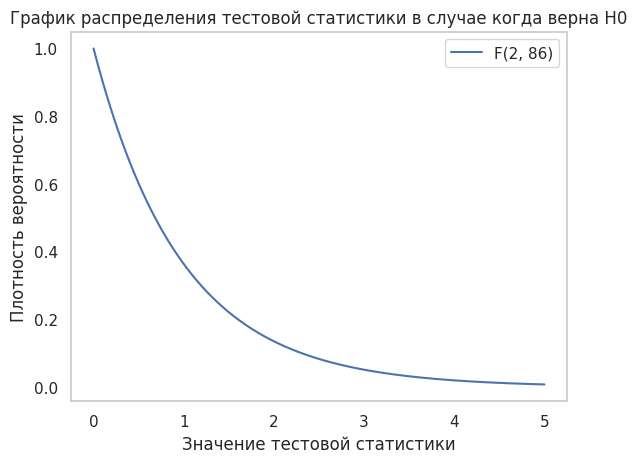

In [61]:
Fisher_dist(2 , 86)

Значение тестовой статистики - 1.22 , p-value - 0.29.Не отвергаем нулевую гипотезу на всех стандартных уровнях значимости . Переменные избыточные.

Посмотрим на результаты теста Рамсея.

In [62]:
RESET_ramsay_test(   linear_regression, [ [2]] )

Только квадраты
Тестовая статистика F 1.4008666455332512
p-значение = P(F(1, 83) > 1.4008666455332512) = 0.23995732536264042



In [63]:
RESET_ramsay_test(linear_regression_delete_variables , [[2]] )

Только квадраты
Тестовая статистика F 1.6282260289344133
p-значение = P(F(1, 85) > 1.6282260289344133) = 0.20542439401628795



Результаты теста рамсея незначительно ухудшились, принимаем решение удалить избыточные переменные.

In [64]:
sq_l_data.drop(columns = ['sq_GS1' , 'sq_UNEMPL' ] , inplace = True)
sq_l_data

,SNP500,GS1,UNEMPL,CPI,FFER,sq_CPI,sq_FFER,l_GS1,l_UNEMPL,l_CPI,l_FFER,FondMarketIndex,MonetaryFiscalIndex,sq_FondMarketIndex
Date,,,,,,,,,,,,,,
2015-04-01,"2,085.51000",0.23000,5.40000,2.06312,0.12467,4.25648,0.01554,-1.46968,1.68640,0.72422,-2.08211,-3.16793,-3.14380,10.03581
2015-05-01,"2,107.39000",0.24000,5.60000,2.06689,0.12323,4.27202,0.01518,-1.42712,1.72277,0.72604,-2.09374,-3.08049,-3.16780,9.48943
2015-06-01,"2,063.11000",0.28000,5.30000,2.11473,0.12900,4.47209,0.01664,-1.27297,1.66771,0.74893,-2.04794,-3.19614,-3.19367,10.21530
2015-07-01,"2,103.84000",0.30000,5.20000,2.14145,0.13032,4.58580,0.01698,-1.20397,1.64866,0.76148,-2.03774,-3.12468,-3.15862,9.76365
2015-08-01,"1,972.18000",0.38000,5.10000,2.18024,0.13806,4.75345,0.01906,-0.96758,1.62924,0.77943,-1.98003,-3.51358,-3.13589,12.34526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-01,"4,109.31000",4.68000,3.50000,6.45171,4.64903,41.62454,21.61350,1.54330,1.25276,1.86434,1.53666,2.62176,3.07979,6.87362
2023-04-01,"4,169.48000",4.68000,3.40000,6.32275,4.83000,39.97715,23.32890,1.54330,1.22378,1.84415,1.57485,2.79366,3.01813,7.80454
2023-05-01,"4,179.83000",4.91000,3.70000,6.00061,5.05581,36.00727,25.56118,1.59127,1.30833,1.79186,1.62054,2.80575,2.94866,7.87222


In [65]:
linear_regression = deepcopy(linear_regression_delete_variables)

In [66]:
# Наша модель. Будем использовать её в последующих тестах.
data = deepcopy(sq_l_data)

##Тесты на наличие структурного сдвига (Чоу, QLR) и тесты по проверке Гомоскедастичности

###Тесты на наличие структурного сдвига

**Тест Чоу**

Тест Чоу обычно используется в области эконометрики с данными временных рядов, чтобы определить, есть ли структурный разрыв в данных в какой-то момент. Тест сравнивает исходную модель, построенную на всей выборке с двумя остаточными моделями, каждая из которых построена на подвыборке (данные до даты структурного сдвига и после).

H0 - в выбранной дате нет структурного сдвига
H1 - структурный сдвиг присутствует

Тестовая статистика рассчитывается по формуле ниже , где RSS(r) - сумма квадратов остатков исходной модели, k - количество параметров исходной модели , RSS(ur) - сумма квадратов остатков остаточных моделей.


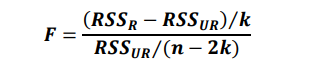


Проведем проверку наличия структурного сдвига в апреле 2020 г. (пик пандемии COVID-19 в США) с помощью теста Чоу:

Апрель 2020 соответствует 60 строке датафрейма. В соответствии с этим разделим нашу выборку на 2 подвыборки - до 60 строки и после.

In [67]:
data.iloc[60 , :]

SNP500                         2,912.43000
GS1                                0.18000
UNEMPL                            14.70000
CPI                                2.22635
FFER                               0.04900
sq_CPI                             4.95664
sq_FFER                            0.00240
l_GS1                             -1.71480
l_UNEMPL                           2.68785
l_CPI                              0.80036
l_FFER                            -3.01593
FondMarketIndex                   -0.37706
MonetaryFiscalIndex                1.12957
sq_FondMarketIndex                 0.14217
Name: 2020-04-01, dtype: float64

Подвыборки

In [68]:
res_model1 = data.iloc[:60]
res_model2 = data.iloc[60:]

"Полная модель"

In [69]:
linear_regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 SNP500   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.412e+04
Date:                Mon, 29 Jan 2024   Prob (F-statistic):          3.33e-137
Time:                        09:21:28   Log-Likelihood:                -431.38
No. Observations:                 100   AIC:                             890.8
Df Residuals:                      86   BIC:                             927.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            2540.2938    155.937     16.291      0.000    2230.302    2850.286
GS1                   -53.1313     12.857     -4.132      0.000     -78.690     -27.572
UNEMPL                 15.4963      9.997      1.550      0.125      -4.378      35.371
CPI                   755.4685    133.256      5.669      0.000     490.565    1020.372
FFER                  -43.1411     25.437     -1.696      0.094     -93.708       7.426
sq_CPI                -47.0302      9.099     -5.169      0.000     -65.118     -28.942
sq_FFER                 8.8905      3.231      2.752      0.007       2.468      15.313
l_GS1                  24.0411     10.989      2.188      0.031       2.195      45.887
l_UNEMPL              -75.3963     85.488     -0.882      0.380    -245.341      94.548
l_CPI               -1057.4448    204.743     -5.165      0.000   -1464.461    -650.429
l_FFER                 12.4043      9.298      1.334      0.186      -6.079      30.888
FondMarketIndex       343.2094      5.405     63.503      0.000     332.465     353.953
MonetaryFiscalIndex   -21.8479      6.608     -3.306      0.001     -34.984      -8.711
sq_FondMarketIndex      6.5215      0.990      6.585      0.000       4.553       8.490
==============================================================================
Omnibus:                        1.180   Durbin-Watson:                   1.263
Prob(Omnibus):                  0.554   Jarque-Bera (JB):                1.259
Skew:                           0.208   Prob(JB):                        0.533
Kurtosis:                       2.641   Cond. No.                     2.62e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Остаточные модели

In [70]:
res_reg1 = smf.ols('SNP500 ~ GS1+UNEMPL+CPI+FFER+sq_CPI+sq_FFER+l_GS1+l_UNEMPL+l_CPI+l_FFER+FondMarketIndex+MonetaryFiscalIndex+sq_FondMarketIndex', data = res_model1).fit()
print(res_reg1.summary())

                            OLS Regression Results                            
Dep. Variable:                 SNP500   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     3613.
Date:                Mon, 29 Jan 2024   Prob (F-statistic):           1.32e-64
Time:                        09:21:28   Log-Likelihood:                -231.71
No. Observations:                  60   AIC:                             491.4
Df Residuals:                      46   BIC:                             520.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             864.8853   8

In [71]:
res_reg2 = smf.ols('SNP500 ~ GS1+UNEMPL+CPI+FFER+sq_CPI+sq_FFER+l_GS1+l_UNEMPL+l_CPI+l_FFER+FondMarketIndex+MonetaryFiscalIndex+sq_FondMarketIndex', data = res_model2).fit()
print(res_reg2.summary())

                            OLS Regression Results                            
Dep. Variable:                 SNP500   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1931.
Date:                Mon, 29 Jan 2024   Prob (F-statistic):           2.39e-35
Time:                        09:21:29   Log-Likelihood:                -164.72
No. Observations:                  40   AIC:                             357.4
Df Residuals:                      26   BIC:                             381.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            3287.4100    

Сумма квадратов остатков первой остаточной модели

In [72]:
rss_resid1 = sum(res_reg1.resid ** 2 )
rss_resid1

7944.309408751104

Сумма квадратов остатков второй остаточной модели

In [73]:
rss_resid2 = sum(res_reg2.resid ** 2 )
rss_resid2

8837.639887298541

Сумма квадратов остаткой исходной модели

In [74]:
rss_full = sum( linear_regression.resid ** 2 )
rss_full

32689.52290072747

Рассчёт тестовой статистики

In [75]:
test_statistic_chow = (  ( rss_full - (rss_resid1 + rss_resid2) ) / 14 ) / ( (rss_resid1 + rss_resid2) / (100 - 2 * 14) )
test_statistic_chow

4.874903212679871

In [76]:
dfn = 14  # степени свободы в числителе
dfd = 72  # степени свободы в знаменателе

p_val = 1 - SS.f.cdf(test_statistic_chow, dfn, dfd)
print("p value:", p_val)

p value: 3.139889822478814e-06


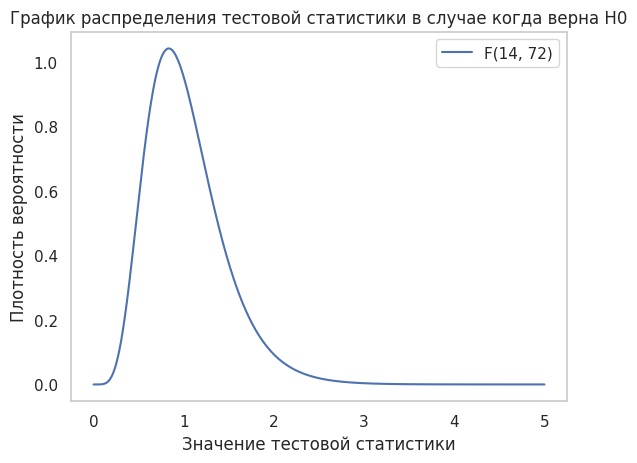

In [77]:
Fisher_dist(14,72)

Отвергаем H0 на всех стандартных уровнях значимости. В выбранной дате присутствует структурный сдвиг.

**QLR** **Тест**

Проводит Тест Чоу на всех наблюдениях кроме 15% процентов наблюдений
на краях временного интервала (в сумме 30%). Находит самую вероятную
дату структурного сдвига в точке, где тестовая статистика Тест Чоу
максимальна. Таким образом, тест отвечает на вопрос, присутствует ли
структурный сдвиг на представленном временном интервале.

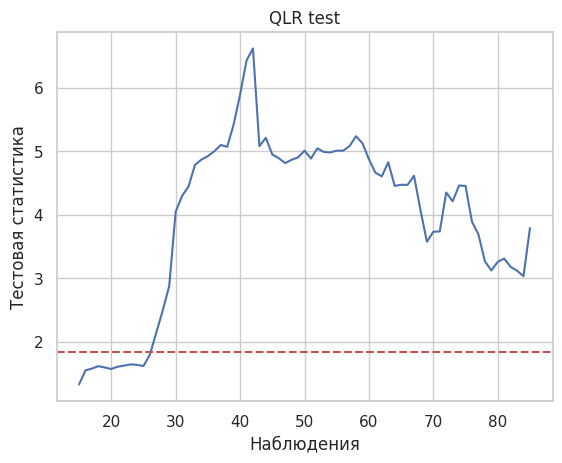

In [78]:
index = 15
indexes = []
test_statistics = []
p_values = []
while index < 86 :

  indexes.append(index)



  res_model1 = data.iloc[:index]
  res_model2 = data.iloc[index:]


  res_reg1 = smf.ols('SNP500 ~ GS1+UNEMPL+CPI+FFER+sq_CPI+sq_FFER+l_GS1+l_UNEMPL+l_CPI+l_FFER+FondMarketIndex+MonetaryFiscalIndex+sq_FondMarketIndex', data = res_model1).fit()
  res_reg2 = smf.ols('SNP500 ~ GS1+UNEMPL+CPI+FFER+sq_CPI+sq_FFER+l_GS1+l_UNEMPL+l_CPI+l_FFER+FondMarketIndex+MonetaryFiscalIndex+sq_FondMarketIndex', data = res_model2).fit()

  rss_resid1 = sum(res_reg1.resid ** 2 )
  rss_resid2 = sum(res_reg2.resid ** 2 )
  rss_full = sum( linear_regression.resid ** 2 )

  test_statistic_chow = (  ( rss_full - rss_resid1 - rss_resid2 ) / 14 ) / ( (rss_resid1 + rss_resid2) / (100 - 2 * 14) )

  dfn = 14
  dfd = 72

  test_statistics.append(test_statistic_chow )

  p_val = 1 - SS.f.cdf(test_statistic_chow, dfn, dfd)
  p_values.append(p_val)

  index += 1




plt.plot(indexes, test_statistics)
plt.xlabel('Наблюдения')
plt.ylabel('Тестовая статистика')
plt.title('QLR test')
plt.grid(True)
crit_value = SS.f.ppf(0.95, dfn, dfd)
plt.axhline(y=crit_value, color='r', linestyle='--')
plt.show()

Максимальная тестовая статистика

In [79]:
max(test_statistics)



6.618917010675674

Дата с максимальной тестовой статистикой

In [80]:
test_statistics.index(max(test_statistics))

27

In [81]:
data.iloc[27+15 , :]

SNP500                         2,711.74000
GS1                                2.65000
UNEMPL                             3.80000
CPI                                2.41499
FFER                               2.18774
sq_CPI                             5.83217
sq_FFER                            4.78621
l_GS1                              0.97456
l_UNEMPL                           1.33500
l_CPI                              0.88169
l_FFER                             0.78287
FondMarketIndex                   -0.78730
MonetaryFiscalIndex               -1.63863
sq_FondMarketIndex                 0.61984
Name: 2018-10-01, dtype: float64

###Тесты по проверке гетероскедастичности

**Тест Вайта (квадраты)**

H0: остатки гомоскедастичны (дисперсия остатков постоянна).

H1: остатки гетероскедастичны (дисперсия остатков непостоянна).

Описание:
Строит зависимость между квадратами остатков входной модели и
регрессорами входной модели, их квадратами и линейными комбинациями.
Оценивает качество построенной модели по коэффициенту детерминации.
Если модель построилась хорошо, то, скорее всего, H0 отвергается в пользу
H1. Иначе – не отвергается. Так как остатки являются оценками ошибок,
стоящих в генераторе данных, то с помощью данного теста можно проверять
одно из условий теоремы Гаусса-Маркова.


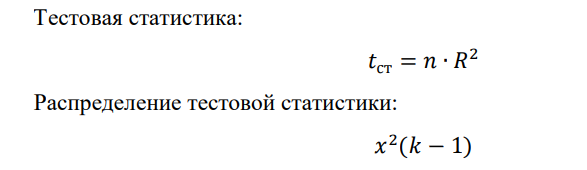

посмотрим на квадраты остатков исходной модели

In [82]:
residuals_sq = linear_regression.resid ** 2
residuals_sq = pd.DataFrame( residuals_sq , columns = ['sq_residuals'])
residuals_sq

,sq_residuals
Date,
2015-04-01,773.79591
2015-05-01,474.19050
2015-06-01,62.97482
2015-07-01,662.46024
2015-08-01,49.37874
...,...
2023-03-01,149.57079
2023-04-01,808.41408
2023-05-01,428.53970


График изменения квадратов остатков модели в зависимости от наблюдения

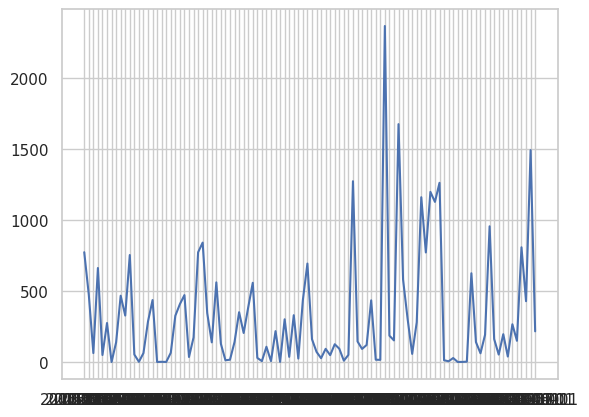

In [83]:
plt.plot(residuals_sq)

In [84]:
regressors = data.drop( columns = ['SNP500'] , axis = 1 )
regressors

,GS1,UNEMPL,CPI,FFER,sq_CPI,sq_FFER,l_GS1,l_UNEMPL,l_CPI,l_FFER,FondMarketIndex,MonetaryFiscalIndex,sq_FondMarketIndex
Date,,,,,,,,,,,,,
2015-04-01,0.23000,5.40000,2.06312,0.12467,4.25648,0.01554,-1.46968,1.68640,0.72422,-2.08211,-3.16793,-3.14380,10.03581
2015-05-01,0.24000,5.60000,2.06689,0.12323,4.27202,0.01518,-1.42712,1.72277,0.72604,-2.09374,-3.08049,-3.16780,9.48943
2015-06-01,0.28000,5.30000,2.11473,0.12900,4.47209,0.01664,-1.27297,1.66771,0.74893,-2.04794,-3.19614,-3.19367,10.21530
2015-07-01,0.30000,5.20000,2.14145,0.13032,4.58580,0.01698,-1.20397,1.64866,0.76148,-2.03774,-3.12468,-3.15862,9.76365
2015-08-01,0.38000,5.10000,2.18024,0.13806,4.75345,0.01906,-0.96758,1.62924,0.77943,-1.98003,-3.51358,-3.13589,12.34526
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-01,4.68000,3.50000,6.45171,4.64903,41.62454,21.61350,1.54330,1.25276,1.86434,1.53666,2.62176,3.07979,6.87362
2023-04-01,4.68000,3.40000,6.32275,4.83000,39.97715,23.32890,1.54330,1.22378,1.84415,1.57485,2.79366,3.01813,7.80454
2023-05-01,4.91000,3.70000,6.00061,5.05581,36.00727,25.56118,1.59127,1.30833,1.79186,1.62054,2.80575,2.94866,7.87222


In [85]:
counter = 0

In [86]:
regressors_white = deepcopy(regressors)

In [87]:
clmns = list(regressors.columns)
if counter == 0 :
  for column in clmns :
    if f'sq_{column}' not in clmns :
      regressors_white[f'sq_{column}'] = regressors_white[column] ** 2



counter = 1
regressors_white

,GS1,UNEMPL,CPI,FFER,sq_CPI,sq_FFER,l_GS1,l_UNEMPL,l_CPI,l_FFER,...,sq_GS1,sq_UNEMPL,sq_sq_CPI,sq_sq_FFER,sq_l_GS1,sq_l_UNEMPL,sq_l_CPI,sq_l_FFER,sq_MonetaryFiscalIndex,sq_sq_FondMarketIndex
Date,,,,,,,,,,,,,,,,,,,,,
2015-04-01,0.23000,5.40000,2.06312,0.12467,4.25648,0.01554,-1.46968,1.68640,0.72422,-2.08211,...,0.05290,29.16000,18.11761,0.00024,2.15995,2.84394,0.52450,4.33519,9.88347,100.71752
2015-05-01,0.24000,5.60000,2.06689,0.12323,4.27202,0.01518,-1.42712,1.72277,0.72604,-2.09374,...,0.05760,31.36000,18.25017,0.00023,2.03666,2.96792,0.52714,4.38373,10.03498,90.04935
2015-06-01,0.28000,5.30000,2.11473,0.12900,4.47209,0.01664,-1.27297,1.66771,0.74893,-2.04794,...,0.07840,28.09000,19.99962,0.00028,1.62044,2.78125,0.56089,4.19407,10.19954,104.35233
2015-07-01,0.30000,5.20000,2.14145,0.13032,4.58580,0.01698,-1.20397,1.64866,0.76148,-2.03774,...,0.09000,27.04000,21.02955,0.00029,1.44955,2.71808,0.57985,4.15239,9.97685,95.32892
2015-08-01,0.38000,5.10000,2.18024,0.13806,4.75345,0.01906,-0.96758,1.62924,0.77943,-1.98003,...,0.14440,26.01000,22.59524,0.00036,0.93622,2.65442,0.60752,3.92054,9.83382,152.40534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-01,4.68000,3.50000,6.45171,4.64903,41.62454,21.61350,1.54330,1.25276,1.86434,1.53666,...,21.90240,12.25000,"1,732.60235",467.14342,2.38177,1.56942,3.47578,2.36132,9.48510,47.24660
2023-04-01,4.68000,3.40000,6.32275,4.83000,39.97715,23.32890,1.54330,1.22378,1.84415,1.57485,...,21.90240,11.56000,"1,598.17257",544.23758,2.38177,1.49763,3.40090,2.48014,9.10912,60.91084
2023-05-01,4.91000,3.70000,6.00061,5.05581,36.00727,25.56118,1.59127,1.30833,1.79186,1.62054,...,24.10810,13.69000,"1,296.52330",653.37387,2.53215,1.71173,3.21076,2.62614,8.69457,61.97182


In [88]:
list(regressors_white.columns)

['GS1',
 'UNEMPL',
 'CPI',
 'FFER',
 'sq_CPI',
 'sq_FFER',
 'l_GS1',
 'l_UNEMPL',
 'l_CPI',
 'l_FFER',
 'FondMarketIndex',
 'MonetaryFiscalIndex',
 'sq_FondMarketIndex',
 'sq_GS1',
 'sq_UNEMPL',
 'sq_sq_CPI',
 'sq_sq_FFER',
 'sq_l_GS1',
 'sq_l_UNEMPL',
 'sq_l_CPI',
 'sq_l_FFER',
 'sq_MonetaryFiscalIndex',
 'sq_sq_FondMarketIndex']

In [89]:
test_white_data = pd.concat([residuals_sq, regressors_white], axis=1)
test_white_data = test_white_data.rename(columns = { 0 : 'sq_residuals'})
test_white_data

,sq_residuals,GS1,UNEMPL,CPI,FFER,sq_CPI,sq_FFER,l_GS1,l_UNEMPL,l_CPI,...,sq_GS1,sq_UNEMPL,sq_sq_CPI,sq_sq_FFER,sq_l_GS1,sq_l_UNEMPL,sq_l_CPI,sq_l_FFER,sq_MonetaryFiscalIndex,sq_sq_FondMarketIndex
Date,,,,,,,,,,,,,,,,,,,,,
2015-04-01,773.79591,0.23000,5.40000,2.06312,0.12467,4.25648,0.01554,-1.46968,1.68640,0.72422,...,0.05290,29.16000,18.11761,0.00024,2.15995,2.84394,0.52450,4.33519,9.88347,100.71752
2015-05-01,474.19050,0.24000,5.60000,2.06689,0.12323,4.27202,0.01518,-1.42712,1.72277,0.72604,...,0.05760,31.36000,18.25017,0.00023,2.03666,2.96792,0.52714,4.38373,10.03498,90.04935
2015-06-01,62.97482,0.28000,5.30000,2.11473,0.12900,4.47209,0.01664,-1.27297,1.66771,0.74893,...,0.07840,28.09000,19.99962,0.00028,1.62044,2.78125,0.56089,4.19407,10.19954,104.35233
2015-07-01,662.46024,0.30000,5.20000,2.14145,0.13032,4.58580,0.01698,-1.20397,1.64866,0.76148,...,0.09000,27.04000,21.02955,0.00029,1.44955,2.71808,0.57985,4.15239,9.97685,95.32892
2015-08-01,49.37874,0.38000,5.10000,2.18024,0.13806,4.75345,0.01906,-0.96758,1.62924,0.77943,...,0.14440,26.01000,22.59524,0.00036,0.93622,2.65442,0.60752,3.92054,9.83382,152.40534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-01,149.57079,4.68000,3.50000,6.45171,4.64903,41.62454,21.61350,1.54330,1.25276,1.86434,...,21.90240,12.25000,"1,732.60235",467.14342,2.38177,1.56942,3.47578,2.36132,9.48510,47.24660
2023-04-01,808.41408,4.68000,3.40000,6.32275,4.83000,39.97715,23.32890,1.54330,1.22378,1.84415,...,21.90240,11.56000,"1,598.17257",544.23758,2.38177,1.49763,3.40090,2.48014,9.10912,60.91084
2023-05-01,428.53970,4.91000,3.70000,6.00061,5.05581,36.00727,25.56118,1.59127,1.30833,1.79186,...,24.10810,13.69000,"1,296.52330",653.37387,2.53215,1.71173,3.21076,2.62614,8.69457,61.97182


In [90]:
test_white_reg = smf.ols('sq_residuals ~ GS1+UNEMPL+CPI+FFER+sq_CPI+sq_FFER+l_GS1+l_UNEMPL+l_CPI+l_FFER+FondMarketIndex+MonetaryFiscalIndex+sq_FondMarketIndex+sq_GS1+sq_UNEMPL+sq_sq_CPI+sq_sq_FFER+sq_l_GS1+sq_l_UNEMPL+sq_l_CPI+sq_l_FFER+sq_MonetaryFiscalIndex+sq_sq_FondMarketIndex', data = test_white_data).fit()
print(test_white_reg.summary())

                            OLS Regression Results                            
Dep. Variable:           sq_residuals   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     2.811
Date:                Mon, 29 Jan 2024   Prob (F-statistic):           0.000394
Time:                        09:21:34   Log-Likelihood:                -714.86
No. Observations:                 100   AIC:                             1478.
Df Residuals:                      76   BIC:                             1540.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               1.50

Считаем тестовую статистику

In [91]:
test_stat_white = 0.46 * 100
test_stat_white

46.0

P-value

In [92]:
p_value = 1 - SS.chi2.cdf(test_stat_white, 23)

# Выведите результат
print("p-значение:", p_value)

p-значение: 0.002991154812761909


Не отвергаем нулевую гипотезу. Остатки модели гомоскедастичны

**Тест Бриша-Пэгана**

H0: остатки гомоскедастичны (дисперсия остатков постоянна).

H1: остатки гетероскедастичны (дисперсия остатков непостоянна).

Описание:
Строит зависимость между масштабированными квадратами остатков
входной моделии регрессорами входной модели. Оценивает
качество построенной модели по объясненной сумме квадратов остатков
(ESS). Если модель построилась хорошо, то, скорее всего, H0 отвергается в
пользу H1. Иначе – не отвергается. Так как остатки являются оценками
ошибок, стоящих в генераторе данных, то с помощью данного теста можно
проверять одно из условий теоремы Гаусса-Маркова.

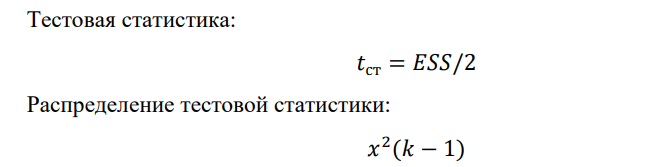


In [93]:
regressors_bp = pd.concat([residuals_sq , regressors ] , axis = 1)
regressors_bp

,sq_residuals,GS1,UNEMPL,CPI,FFER,sq_CPI,sq_FFER,l_GS1,l_UNEMPL,l_CPI,l_FFER,FondMarketIndex,MonetaryFiscalIndex,sq_FondMarketIndex
Date,,,,,,,,,,,,,,
2015-04-01,773.79591,0.23000,5.40000,2.06312,0.12467,4.25648,0.01554,-1.46968,1.68640,0.72422,-2.08211,-3.16793,-3.14380,10.03581
2015-05-01,474.19050,0.24000,5.60000,2.06689,0.12323,4.27202,0.01518,-1.42712,1.72277,0.72604,-2.09374,-3.08049,-3.16780,9.48943
2015-06-01,62.97482,0.28000,5.30000,2.11473,0.12900,4.47209,0.01664,-1.27297,1.66771,0.74893,-2.04794,-3.19614,-3.19367,10.21530
2015-07-01,662.46024,0.30000,5.20000,2.14145,0.13032,4.58580,0.01698,-1.20397,1.64866,0.76148,-2.03774,-3.12468,-3.15862,9.76365
2015-08-01,49.37874,0.38000,5.10000,2.18024,0.13806,4.75345,0.01906,-0.96758,1.62924,0.77943,-1.98003,-3.51358,-3.13589,12.34526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-01,149.57079,4.68000,3.50000,6.45171,4.64903,41.62454,21.61350,1.54330,1.25276,1.86434,1.53666,2.62176,3.07979,6.87362
2023-04-01,808.41408,4.68000,3.40000,6.32275,4.83000,39.97715,23.32890,1.54330,1.22378,1.84415,1.57485,2.79366,3.01813,7.80454
2023-05-01,428.53970,4.91000,3.70000,6.00061,5.05581,36.00727,25.56118,1.59127,1.30833,1.79186,1.62054,2.80575,2.94866,7.87222


In [94]:
regressors_bp['sq_residuals'] = regressors_bp['sq_residuals'] / regressors_bp['sq_residuals'].mean()

In [95]:
regressors_bp

,sq_residuals,GS1,UNEMPL,CPI,FFER,sq_CPI,sq_FFER,l_GS1,l_UNEMPL,l_CPI,l_FFER,FondMarketIndex,MonetaryFiscalIndex,sq_FondMarketIndex
Date,,,,,,,,,,,,,,
2015-04-01,2.36711,0.23000,5.40000,2.06312,0.12467,4.25648,0.01554,-1.46968,1.68640,0.72422,-2.08211,-3.16793,-3.14380,10.03581
2015-05-01,1.45059,0.24000,5.60000,2.06689,0.12323,4.27202,0.01518,-1.42712,1.72277,0.72604,-2.09374,-3.08049,-3.16780,9.48943
2015-06-01,0.19265,0.28000,5.30000,2.11473,0.12900,4.47209,0.01664,-1.27297,1.66771,0.74893,-2.04794,-3.19614,-3.19367,10.21530
2015-07-01,2.02652,0.30000,5.20000,2.14145,0.13032,4.58580,0.01698,-1.20397,1.64866,0.76148,-2.03774,-3.12468,-3.15862,9.76365
2015-08-01,0.15105,0.38000,5.10000,2.18024,0.13806,4.75345,0.01906,-0.96758,1.62924,0.77943,-1.98003,-3.51358,-3.13589,12.34526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-01,0.45755,4.68000,3.50000,6.45171,4.64903,41.62454,21.61350,1.54330,1.25276,1.86434,1.53666,2.62176,3.07979,6.87362
2023-04-01,2.47301,4.68000,3.40000,6.32275,4.83000,39.97715,23.32890,1.54330,1.22378,1.84415,1.57485,2.79366,3.01813,7.80454
2023-05-01,1.31094,4.91000,3.70000,6.00061,5.05581,36.00727,25.56118,1.59127,1.30833,1.79186,1.62054,2.80575,2.94866,7.87222


In [96]:
test_bp = smf.ols('sq_residuals ~ GS1+UNEMPL+CPI+FFER+sq_CPI+sq_FFER+l_GS1+l_UNEMPL+l_CPI+l_FFER+FondMarketIndex+MonetaryFiscalIndex+sq_FondMarketIndex', data = regressors_bp).fit()
print(test_bp.summary())

                            OLS Regression Results                            
Dep. Variable:           sq_residuals   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     3.264
Date:                Mon, 29 Jan 2024   Prob (F-statistic):           0.000480
Time:                        09:21:35   Log-Likelihood:                -146.62
No. Observations:                 100   AIC:                             321.2
Df Residuals:                      86   BIC:                             357.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              12.3563    

In [97]:
ESS_bp = test_bp.ess
ESS_bp

54.2342674091382

Тестовая статистика

In [98]:
LM = ESS_bp / 2
LM

27.1171337045691

P-value

In [99]:
p_val = 1 - SS.chi2.cdf(27.1171337045691, 13)
print("p value:", p_val)

p value: 0.011989477122949621


Значение тестовой статистики 27,11. P-value - 0.0119. На 5% уровне значимости отвергаем нулевую гипотезу. Остатки модели гомоскедастичны.

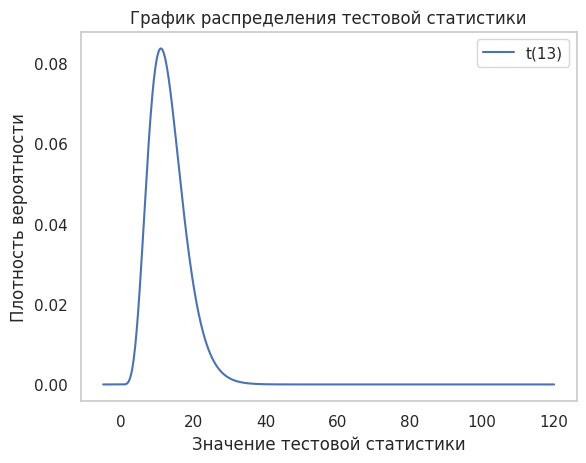

In [100]:
def Xsquare_dist( s ) :


  x = np.linspace(-5, 120, 1000)  # Например, от 0 до 5 с шагом 0.005
  pdf_values = SS.chi2.pdf(x, s)
  plt.plot(x, pdf_values, label=f't({s})')
  plt.xlabel('Значение тестовой статистики')
  plt.ylabel('Плотность вероятности')
  plt.title('График распределения тестовой статистики')
  plt.legend()
  plt.grid()
  plt.show()

Xsquare_dist(13)

##**Построение ВМНК**

Для улучшения качества оценки коэффициентов регрессионных моделей с неодинаковой дисперсией (гетероскедастичной случайной составляющей) используется взвешенный метод наименьших квадратов (ВМНК).

In [101]:
weights = np.mean( linear_regression.resid ** 2 ) / linear_regression.resid ** 2
weights

Date
2015-04-01                0.42246
2015-05-01                0.68938
2015-06-01                5.19089
2015-07-01                0.49346
2015-08-01                6.62016
                     ...         
2023-03-01                2.18556
2023-04-01                0.40437
2023-05-01                0.76281
2023-06-01                0.21893
2023-07-01                1.51189
Length: 100, dtype: float64

In [102]:
y = data['SNP500']
X = data.drop(columns = ['SNP500'] , axis = 1 )

X

,GS1,UNEMPL,CPI,FFER,sq_CPI,sq_FFER,l_GS1,l_UNEMPL,l_CPI,l_FFER,FondMarketIndex,MonetaryFiscalIndex,sq_FondMarketIndex
Date,,,,,,,,,,,,,
2015-04-01,0.23000,5.40000,2.06312,0.12467,4.25648,0.01554,-1.46968,1.68640,0.72422,-2.08211,-3.16793,-3.14380,10.03581
2015-05-01,0.24000,5.60000,2.06689,0.12323,4.27202,0.01518,-1.42712,1.72277,0.72604,-2.09374,-3.08049,-3.16780,9.48943
2015-06-01,0.28000,5.30000,2.11473,0.12900,4.47209,0.01664,-1.27297,1.66771,0.74893,-2.04794,-3.19614,-3.19367,10.21530
2015-07-01,0.30000,5.20000,2.14145,0.13032,4.58580,0.01698,-1.20397,1.64866,0.76148,-2.03774,-3.12468,-3.15862,9.76365
2015-08-01,0.38000,5.10000,2.18024,0.13806,4.75345,0.01906,-0.96758,1.62924,0.77943,-1.98003,-3.51358,-3.13589,12.34526
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-01,4.68000,3.50000,6.45171,4.64903,41.62454,21.61350,1.54330,1.25276,1.86434,1.53666,2.62176,3.07979,6.87362
2023-04-01,4.68000,3.40000,6.32275,4.83000,39.97715,23.32890,1.54330,1.22378,1.84415,1.57485,2.79366,3.01813,7.80454
2023-05-01,4.91000,3.70000,6.00061,5.05581,36.00727,25.56118,1.59127,1.30833,1.79186,1.62054,2.80575,2.94866,7.87222


In [103]:

wls = sm.WLS(y , sm.add_constant(X), weights= weights ).fit()

print(wls.summary())

                            WLS Regression Results                            
Dep. Variable:                 SNP500   R-squared:                       1.000
Model:                            WLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.235e+06
Date:                Mon, 29 Jan 2024   Prob (F-statistic):          9.11e-232
Time:                        09:21:35   Log-Likelihood:                -365.97
No. Observations:                 100   AIC:                             759.9
Df Residuals:                      86   BIC:                             796.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2463.0953    

**Тест на нормальность распределения остатков (Шапиро Уилка)**

H0 - остатки распределены нормально, H1 - отсутствует нормальное распределение

In [104]:
wls_res = wls.resid
wls_res

Date
2015-04-01               25.97019
2015-05-01               20.36846
2015-06-01                7.06490
2015-07-01               25.44988
2015-08-01                6.43576
                     ...         
2023-03-01               -6.53812
2023-04-01              -24.27242
2023-05-01              -21.00488
2023-06-01               33.31019
2023-07-01                7.63576
Length: 100, dtype: float64

In [105]:
from scipy import stats
res = stats.normaltest(wls_res)
res

NormaltestResult(statistic=0.00946270185330869, pvalue=0.9952798242825822)

Нет оснований отвергнуть нулевую гипотезу ни на одном из стандартных уровней значимости.

График распределения тестовой статистики в случае когда верна нулевая гипотеза

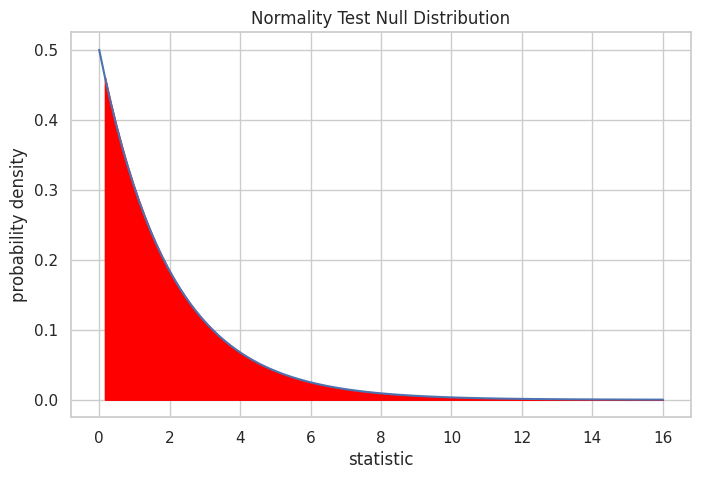

In [106]:
dist = stats.chi2(df=2)
stat_vals = np.linspace(0, 16, 100)
pdf = dist.pdf(stat_vals)
fig, ax = plt.subplots(figsize=(8, 5))
def plot(ax):
    ax.plot(stat_vals, pdf)
    ax.set_title("Normality Test Null Distribution")
    ax.set_xlabel("statistic")
    ax.set_ylabel("probability density")
    i = stat_vals >= res.statistic  # index more extreme statistic values
    ax.fill_between(stat_vals[i], y1=0, y2=pdf[i] , color = 'red')


plot(ax)
plt.show()



##**Тест Дарбина-Уотсона**

Одним из основных допущений линейной регрессии является отсутствие корреляции между последовательными остатками.Другими словами, предполагается, что остатки независимы.

Один из способов определить, выполняется ли это предположение, — выполнить тест Дарбина-Ватсона , который используется для обнаружения наличия автокорреляции в остатках регрессии.

Тестовая статистика рассчитывается по формуле

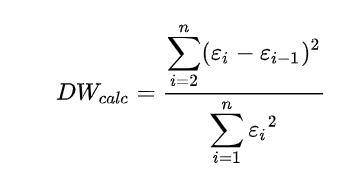

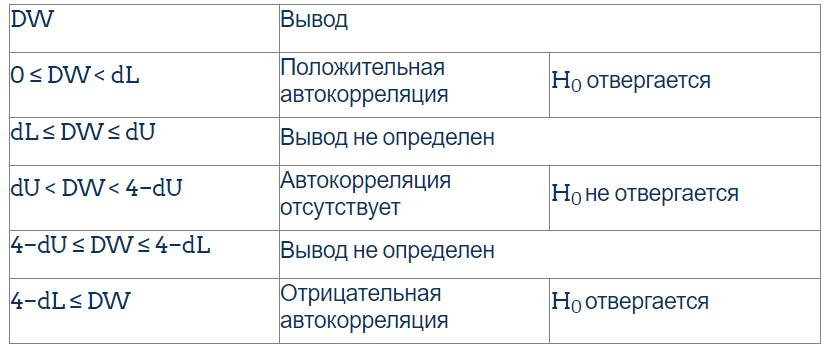

Рассчитаем тестовую статистику с помощью statsmodels

In [135]:
from statsmodels.stats.stattools import durbin_watson
dw = durbin_watson(wls.resid)
dw

1.2614948201062093

Альтернативный способ рассчёта тестовой статистики вручную

In [108]:
counter = 1
total = []
while counter < 100  :
  total.append( (wls.resid.iloc[counter] - wls.resid.iloc[counter - 1 ] ) ** 2 )
  counter += 1

sum_total = sum(total)
sum_total

42132.05521635818

In [109]:
DW = sum_total / sum(wls.resid ** 2 )

In [110]:
DW

1.261494820106209

Значение тестовой статистики DW=1,261495 < dL=1,3935 , следовательно нулевая гипотеза отвергается, присутствует положительная автокорреляция остатков.

<Axes: xlabel='Date'>

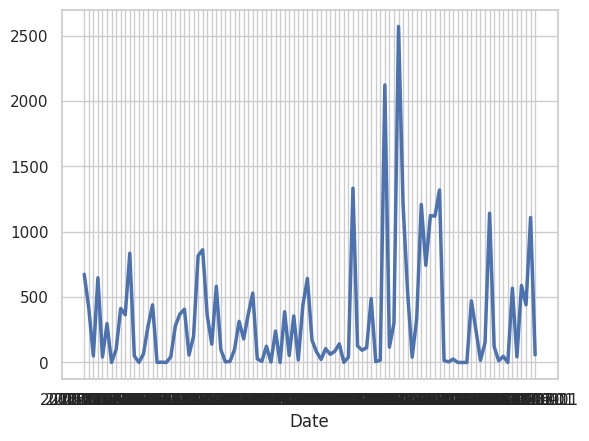

In [111]:

sns.lineplot(wls_res ** 2, palette="tab10", linewidth=2.5)

##**Выводы и прогноз**

In [112]:
print(wls.summary())

                            WLS Regression Results                            
Dep. Variable:                 SNP500   R-squared:                       1.000
Model:                            WLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.235e+06
Date:                Mon, 29 Jan 2024   Prob (F-statistic):          9.11e-232
Time:                        09:21:37   Log-Likelihood:                -365.97
No. Observations:                 100   AIC:                             759.9
Df Residuals:                      86   BIC:                             796.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2463.0953    

Итоговое уравнение имеет вид:
Y(объясн.) = -49.9667 * GS1 + 15.5964 * UNEMPL + 866.95 * CPI - 38.0142* FFER - 54.9366 * sq_CPI + 7.9699 * sq_FFER + 19.7720 * l_GS1 - 75.0555 * l_UNEMPL - 1235.9871 * l_CPI + 12.9745 * l_FFER + 341.7628 * FondMarketIndex - 21.0263 * MFI + 6.7655 * sq_FondMarketIndex.

**Выводы:**

При увеличении годовой ставки казначейства на 1% (GS1)  Индекс S&P 500 уменьшается на 46,3 единиц , при прочих неизменных факторах;
Пояснения: SNP500 =...-50,0×GS1+19,8×ln(GS1)+... ;
следовательно, для изменения получаем  ΔSNP500=(-50,0×GS1+19,8×ln(GS1))′ΔGS1
ΔSNP500=(-50,0 + 19,8/GS1)ΔGS1 =(-50,0 + 19,8/5,37)ΔGS1=-46,3×ΔGS1


При увеличении уровня безработицы на 1% (UNEMPL) Индекс S&P 500 уменьшается на 5.86 единиц, при прочих неизменных факторах;
Пояснения: SNP500 =...+15,6×UNEMPL-75,1×ln(UNEMPL)+... ;
следовательно, для изменения получаем  ΔSNP500=(15,6×UNEMPL-75,1×ln(UNEMPL))′ΔUNEMPL
ΔSNP500=(15,6 - 75,1/UNEMPL)ΔUNEMPL =(15,6 - 75,1/ 3,5)ΔUNEMPL= -5.86 ×ΔUNEMPL

При увеличении индекса потребительских цен за вычетом продуктов питания и энергии (CPI) на 1 % Индекс S&P 500 увеличивается на 40,7 единицы , при прочих неизменных факторах ;
Пояснения: SNP500 =...+867×CPI -54,9×CPI2 - 1,24e+03 x ln(CPI) + ... ;
следовательно, для изменения получаем  ΔSNP500=(867×CPI -54,9×CPI2 - 1240 x ln(CPI))′ΔCPI
ΔSNP500=(867 - 54,9 * 2 x CPI -  1,24e+03 / CPI ) x  ΔCPI =(867 - 109,8 x 5,456089 - 1240 / 5,456089 )ΔCPI= 40,7 ×ΔCPI


При увеличении процентной ставки по федеральным фондам США (FFER) на 1 % Индекс S&P 500 увеличивается на 46,2 единиц , при прочих неизменных факторах ;
Пояснения: SNP500 =...-38,0 x FFER  + 7,97×FFER2 + 13,0 x ln(FFER) + ... ;
следовательно, для изменения получаем  ΔSNP500=( -38,0 x FFER  + 7,97×FFER2 + 13,0 x ln(FFER) )′ΔFFER
ΔSNP500=(-38,0 + 7,97 * 2 x FFER + 13,0 / FFER ) x  ΔFFER =(-38,0 + 15,94 * 5,12 + 13/ 5,12 )ΔFFER= 46,2 ×ΔFFER


При увеличении индекса фондового рынка США ( FondMarketIndex ) на 0,1 Индекс S&P 500 увеличивается на 39,6 единиц, при прочих неизменных факторах;
Пояснения: SNP500 = ... 343 x FondMarketIndex  + 6,83 x FondMarketIndex2  + ... ;
следовательно, для изменения получаем  ΔSNP500=( 343 x FondMarketIndex +6,83×FondMarketIndex2 )′ΔFondMarketIndex
ΔSNP500=(343 + 6,83 * 2 x FondMarketIndex  ) x  ΔFondMarketIndex  =( 343 + 13,66 x 3,8574 )ΔFondMarketIndex= 396 ×ΔFondMarketIndex



При увеличении индекса фискально-монетарной политики США (MonetaryFiscalIndex) на 0,1 , индекс S&P 500 уменьшается  на 2,11 единиц, при прочих неизменных факторах;

**Посмотрим какое значение предскажет модель для последнего значения временного ряда индекса S&P500**

Все предсказания.

In [113]:
total_preds = wls.predict( wls.model.exog )
total_preds

array([2059.5398146 , 2087.02154415, 2056.04510127, 2078.39012428,
       1965.74424363, 1937.26089065, 2079.36030622, 2090.33828076,
       2064.25830948, 1959.34153221, 1961.13419619, 2066.77535593,
       2064.38547218, 2088.89015443, 2082.22860253, 2152.60964607,
       2171.5176903 , 2166.69798077, 2126.32338687, 2205.37553243,
       2255.52712753, 2298.12601495, 2383.82176494, 2355.22534912,
       2370.02810798, 2383.21453113, 2394.04759248, 2451.31305236,
       2459.81653008, 2495.23542538, 2585.09861678, 2649.68971626,
       2676.48426518, 2833.75351302, 2731.55994201, 2654.29183469,
       2667.21829393, 2728.30665895, 2723.56588609, 2813.31938169,
       2890.37875537, 2915.76835881, 2727.24689196, 2759.98085313,
       2526.54931895, 2711.37586378, 2803.36136093, 2830.04027126,
       2924.92202959, 2726.69405376, 2928.69463268, 2971.38515784,
       2931.2894538 , 2966.46128414, 3029.65381685, 3150.22297826,
       3218.86841666, 3226.52213446, 2960.60904877, 2621.10664

Фиктивное предсказание для 07.2023

In [114]:
wls.predict( wls.model.exog )[-1]

4581.324241316443

##**Метод максимального правдоподобия (ММП); Логит и Пробит модели бинарного выбора**

Бинарная переменная SNP500. ( 1 - если предыдущее значение меньше следующего, 0 - следующее больше предыдущего)

In [115]:
counter = 1
binary_SNP500 = []
while counter < 100 :
  if (data.SNP500.iloc[counter] - data.SNP500.iloc[counter-1]) > 0 :
    binary_SNP500.append(1)
  else :
    binary_SNP500.append(0)


  counter += 1

len(binary_SNP500)

99

Первые разности регрессоров NASDAQ и DJONES как регрессоры новой модели

In [116]:
data = pd.read_csv('Econometric/SNP500_data.csv' , sep= ';')

In [117]:
counter = 1
d_NASDAQ = []
while counter < 100 :

  d_NASDAQ.append(data.NASDAQ.iloc[counter] - data.NASDAQ.iloc[counter-1])
  counter += 1






In [118]:
counter = 1
d_DJONES = []
while counter < 100 :

  d_DJONES.append(data.DJONES.iloc[counter] - data.DJONES.iloc[counter-1])
  counter += 1


In [119]:
BinaryModel = pd.DataFrame( {'B_SNP500' : binary_SNP500 , 'd_NASDAQ' : d_NASDAQ , 'd_DJONES' : d_DJONES })
BinaryModel

,B_SNP500,d_NASDAQ,d_DJONES
0,1,128.61000,170.16000
1,0,-83.16000,-391.17000
2,1,141.41000,70.35000
3,0,-351.77000,"-1,161.83000"
4,0,-156.35000,-243.33000
...,...,...,...
94,1,766.37000,617.45000
95,1,4.67000,824.01000
96,1,708.71000,"-1,189.89000"
97,1,852.63000,"1,499.33000"


**Модель Логит**

In [120]:
y = BinaryModel.B_SNP500
X = BinaryModel[['d_NASDAQ' , 'd_DJONES']]

In [121]:
logit_mod = sm.Logit(y , sm.add_constant(X)).fit()
print(logit_mod.summary())

Optimization terminated successfully.
         Current function value: 0.118066
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:               B_SNP500   No. Observations:                   99
Model:                          Logit   Df Residuals:                       96
Method:                           MLE   Df Model:                            2
Date:                Mon, 29 Jan 2024   Pseudo R-squ.:                  0.8124
Time:                        09:21:37   Log-Likelihood:                -11.689
converged:                       True   LL-Null:                       -62.299
Covariance Type:            nonrobust   LLR p-value:                 1.048e-22
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6577      0.553      1.188      0.235      -0.427       1.742
d_NASDAQ       0.0103      0

**Пробит модель**

In [122]:
probit_mod = sm.Probit(y , sm.add_constant(X)).fit()
print(probit_mod.summary())

Optimization terminated successfully.
         Current function value: 0.115370
         Iterations 10
                          Probit Regression Results                           
Dep. Variable:               B_SNP500   No. Observations:                   99
Model:                         Probit   Df Residuals:                       96
Method:                           MLE   Df Model:                            2
Date:                Mon, 29 Jan 2024   Pseudo R-squ.:                  0.8167
Time:                        09:21:37   Log-Likelihood:                -11.422
converged:                       True   LL-Null:                       -62.299
Covariance Type:            nonrobust   LLR p-value:                 8.022e-23
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4168      0.312      1.336      0.182      -0.195       1.028
d_NASDAQ       0.0059      0

Логарифмы функции правдоподобия для обеих моделей

In [123]:
logit_mod.llf


-11.688545084555336

In [124]:
probit_mod.llf

-11.421609497749897

Предсказания меток классов для модели Логит

In [125]:
logit_preds = []
for i in logit_mod.model.predict(logit_mod.params):



  if i > 1/2 :
    logit_preds.append(1)
  elif i < 1/2 :
    logit_preds.append(0)



Матрица ошибок (confusion matrix) для модели Логит

In [126]:
counter = 0

o_as_o = 0
l_as_l = 0
l_as_o = 0
o_as_l = 0


while counter < 99 :
  if BinaryModel.B_SNP500.iloc[counter] == 0 and logit_preds[counter] == 0 :
    o_as_o += 1
  elif BinaryModel.B_SNP500.iloc[counter] == 1 and logit_preds[counter] == 1 :
    l_as_l += 1
  elif BinaryModel.B_SNP500.iloc[counter] == 1 and logit_preds[counter] == 0 :
    l_as_o += 1
  elif BinaryModel.B_SNP500.iloc[counter] == 0 and logit_preds[counter] == 1 :
    o_as_l += 1

  counter += 1

conf_matrix_logit = pd.DataFrame({'Real_0' : [o_as_o , l_as_o ] , 'Real_1' : [  o_as_l , l_as_l ] } )
conf_matrix_logit.index = pd.Index(['Pred_0' , 'Pred_1']  )
conf_matrix_logit

,Real_0,Real_1
Pred_0,27,5
Pred_1,2,65


Графики зависимостей наблюдаемых и рассчётных значений от каждого регрессора для модели Логит

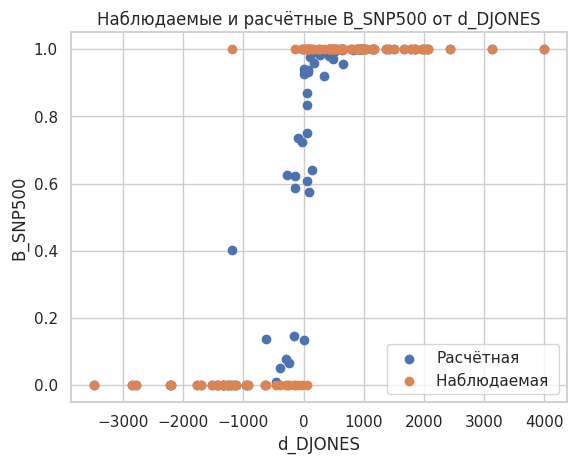

In [127]:
x = BinaryModel.d_DJONES
y1 = logit_mod.model.predict(logit_mod.params)
y2 = y
plt.scatter(x, y1, label='Расчётная')
plt.scatter(x, y2, label='Наблюдаемая ')
plt.title('Наблюдаемые и расчётные B_SNP500 от d_DJONES')
plt.xlabel('d_DJONES')
plt.ylabel('B_SNP500')
plt.legend()
plt.show()

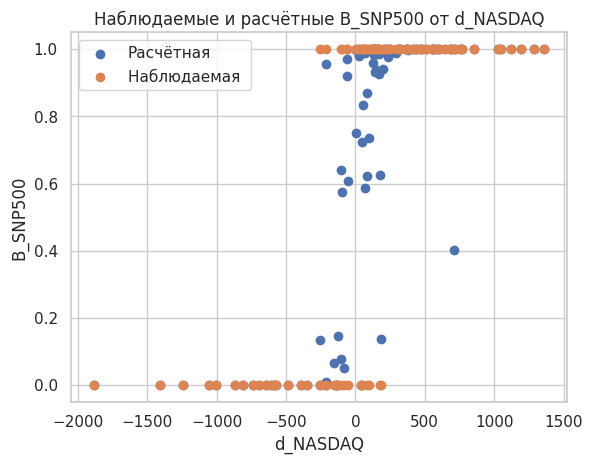

In [128]:
x = BinaryModel.d_NASDAQ
y1 = logit_mod.model.predict(logit_mod.params)
y2 = y
plt.scatter(x, y1, label='Расчётная')
plt.scatter(x, y2, label='Наблюдаемая ')
plt.title('Наблюдаемые и расчётные B_SNP500 от d_NASDAQ')
plt.xlabel('d_NASDAQ')
plt.ylabel('B_SNP500')
plt.legend()
plt.show()

Матрица ошибок для модели Пробит

In [129]:
probit_preds = []
for i in probit_mod.model.predict(probit_mod.params):
  if i > 1/2 :
    probit_preds.append(1)
  elif i < 1/2 :
    probit_preds.append(0)

counter = 0

o_as_o = 0
l_as_l = 0
l_as_o = 0
o_as_l = 0


while counter < 99 :
  if BinaryModel.B_SNP500.iloc[counter] == 0 and probit_preds[counter] == 0 :
    o_as_o += 1
  elif BinaryModel.B_SNP500.iloc[counter] == 1 and probit_preds[counter] == 1 :
    l_as_l += 1
  elif BinaryModel.B_SNP500.iloc[counter] == 1 and probit_preds[counter] == 0 :
    l_as_o += 1
  elif BinaryModel.B_SNP500.iloc[counter] == 0 and probit_preds[counter] == 1 :
    o_as_l += 1

  counter += 1

conf_matrix_probit = pd.DataFrame({'Real_0' : [o_as_o , l_as_o ] , 'Real_1' : [  o_as_l , l_as_l ] } )
conf_matrix_probit.index = pd.Index(['Pred_0' , 'Pred_1']  )
conf_matrix_probit

,Real_0,Real_1
Pred_0,27,5
Pred_1,2,65


Графики зависимостей наблюдаемых и рассчётных значений от каждого регрессора для модели Пробит

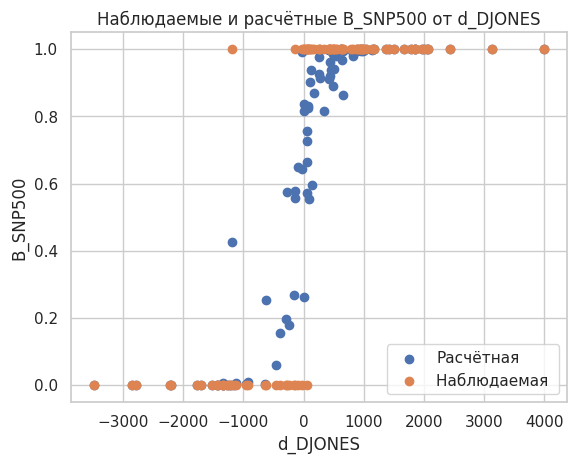

In [130]:
x = BinaryModel.d_DJONES
y1 = logit_mod.model.predict(probit_mod.params)
y2 = y
plt.scatter(x, y1, label='Расчётная')
plt.scatter(x, y2, label='Наблюдаемая ')
plt.title('Наблюдаемые и расчётные B_SNP500 от d_DJONES')
plt.xlabel('d_DJONES')
plt.ylabel('B_SNP500')
plt.legend()
plt.show()

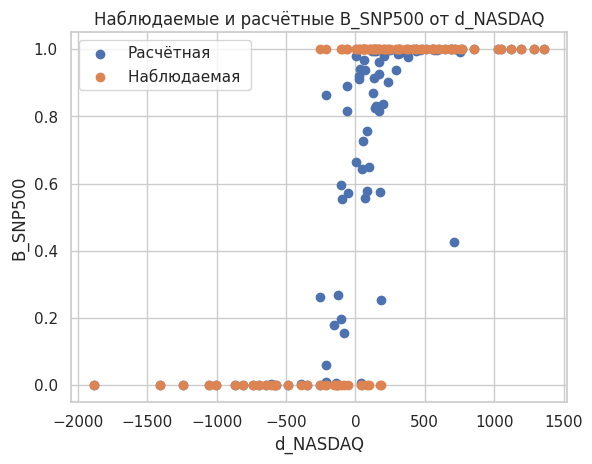

In [131]:
x = BinaryModel.d_NASDAQ
y1 = logit_mod.model.predict(probit_mod.params)
y2 = y
plt.scatter(x, y1, label='Расчётная')
plt.scatter(x, y2, label='Наблюдаемая ')
plt.title('Наблюдаемые и расчётные B_SNP500 от d_NASDAQ')
plt.xlabel('d_NASDAQ')
plt.ylabel('B_SNP500')
plt.legend()
plt.show()

**Выводы**


В модели "Пробит"  коэффициенты при регрессорах d_DJONES и d_NASDAQ значимы на
всех стандартных уровнях значимости;

В модели "Логит"  коэффициент при регрессоре d_DJONES значим на всех стандартных уровнях значимости, коэффициент при регрессоре d_NASDAQ значим на 5-ти процентном уровне значимости;

константа в моделях "Логит" и "Пробит" не значима.


Функция плотности распределения вероятностей тестовой статистики в случае, когда верна
нулевая гипотеза - X2(2)

В обоих моделях количество правильно предсказанных наблюдений − 92 (27 нулей и 65 единиц), что составляет 92,9% всех наблюдений; количество ошибочных предсказаний − 7 (5 наблюдаемых нулей и 2 единиц).

Логарифм функции правдоподобия Логит-модели меньше чем для Пробит-модели −11,68855<−11,42161

Обе модели показали совпадающие результаты, выбрать предпочтительную не представляется возможным (пробит немного лучше).
